# African Music Popularity Prediction

## Introduction and Objectives

This project focuses on the top 7 African music industries with the primary aim of conducting a detailed analysis of regions that wield significant influence within the continent's musical landscape. The selected countries, consistently identified as key players by reputable sources, have been chosen strategically to align with the objectives of our machine learning analysis. The goal of the machine learning model is to predict the popularity of songs and understand the factors contributing to their popularity.

In machine learning, the inclusion of too many diverse and potentially noisy datasets could hinder the precision and interpretability of the model. By narrowing our focus to the top 7 African music industries, we seek to streamline the dataset to include only the most influential and impactful regions. This deliberate selection enhances the model's ability to discern patterns, trends, and features relevant to predicting the popularity of songs.

The criteria employed to identify the top music industries encompassed key factors like market size, cultural influence, export/import dynamics of musical content, and the overall impact on the global music landscape. Two independent articles (https://www.boomplay.com/buzz/3520053 and https://www.schooldrillers.com/biggest-music-industry-in-africa/) were reviewed, ensuring reliability and consistency. This dual-source analysis produced a harmonious list, confirming the top 7 African music industries. Notably, the sources shared a uniform methodology, further enhancing the credibility of the selected regions. The countries selected includes **Nigeria, South Africa, Ghana, Kenya, Tanzania, DR Congo**, and **Benin Republic**.

We exclusively examine songs by *top* and *popular* artists hailing from the selected countries (using google search), and intriguingly, the artists listed  in [Forbes list of the 20 biggest African artists in 2022](https://www.forbesafrica.com/cover-story/2022/08/19/the-playlist-africas-top-20-musicians/) are from the countries selected. Note that the term *top* and *popular* maybe subjective.

In [1]:
# Top African artist according to forbes:
# https://www.forbesafrica.com/cover-story/2022/08/19/the-playlist-africas-top-20-musicians/
forbes = ['Angelique Kidjo', 'Burna Boy', 'Tiwa Savage', 'Davido',
          'Wizkid', 'Master KG', 'Major League Djz', 'Diamond Platnumz',
          'Nasty C', 'Mr Eazi', 'Lebo M.', 'Black Coffee', '2Baba',
          'Cassper Nyovest', 'Yvonne Chaka Chaka', 'KDDO', 'Rayvanny',
          'Fally Ipupa', 'DJ Maphorisa', 'Lira'
         ]

# Biggest Music Industries In Africa:
# https://www.boomplay.com/buzz/3520053
# https://www.schooldrillers.com/biggest-music-industry-in-africa/

NGA = ["Burna Boy", "Davido", "Wizkid", "Olamide", "Tiwa Savage", "Fireboy DML",
       "Joeboy", "Rema", "Patoranking", "Tekno", "Mr Eazi", "Falz", "Blaqbonez", 
       "Adekunle Gold", "Mayorkun", "Oxlade", "Peruzzi", "Tems", "Naira Marley",
       "Simi", "Ajebo Hustlers", "Bella Shmurda", "Ruger", "Bnxn", "Terri", "Fela Kuti",
       "Mohbad", "Asake", "CKay", "Victony", "Omah Lay", "Zinoleesky", "Lyta",
      ]
         

GHA = ['Sarkodie', 'Shatta Wale', 'Stonebwoy', 'KiDi', 'Black Sherif',
       'Gyakie', 'Amerado', 'Kwesi Arthur', 'Kofi Kinaata', 'Efya',
       'Adina Thembi', 'Medikal', 'Wendy Shay', 'King Promise', 'Becca',
       'MzVee', 'Kelvyn Boy', 'Cina Soul', 'DarkoVibes', 'Joey B',
       'Kuami Eugene', 'Camidoh', 'Fameye', 'Akwaboah', 'Mzbel',
       'R2Bees', 'Guru', 'A.B. Crentsil', 'Daddy Lumba', 'Castro',
      ]

ZAF = ["Nasty C", "DJ Maphorisa", "Kabza De Small", "Sho Madjozi", "Blxckie", 
       "Busiswa", "Shekhinah", "YoungstaCPT", "Kwesta", "Black Motion","Mi Casa",
       "Moonchild Sanelly", "Msaki", "Locnville", "Die Antwoord", "TRESOR",
       "Berita", "The Soil", "Mafikizolo", "Brenda Fassie", "Johnny Clegg",
       "Thandiswa", "Hugh Masekela", "Miriam Makeba", "Lucky Dube", "Lady Zamar",
       "Black Coffee", 'Cassper Nyovest', 'AKA', 'Sho Madjozi', 'Prince Kaybee', "ANATII"
      ]

KEN = ["Sauti Sol", "Nyashinski", "Khaligraph Jones", "ETHIC", 
       "Nikita Kering'", "Rekles", "Mr Seed", "Masauti", "Ethic Entertainment",
       "Willy Paul", "Akothee", "Avril", "Kagwe Mungai", "Sanaipei Tande",
       "Fena Gitu", "Mejja", "Eko Dydda", "Teddy Afro", "MOG",
       'Nameless', 'Victoria Kimani', "Kristoff",
      ]
       
TZA = ["Diamond Platnumz", "Nandy", "Harmonize", "Rayvanny", "Zuchu",
       "Alikiba", "Marioo", "Baba Levo", "B-Boy", " Mr Nice",
       "Mzee Bwax", "Queen Darleen", "Dulla Makabila", "Chege Chege",
       "Ben Pol", "Alikiba", "Linah Sanga",
       "Nikki Mbishi", "Afande Sele", "Rosa Ree",
      ]      

DRC = ["Papa Wemba", "Fally Ipupa", "Yxng Bane", "Koffi Olomide", "Werrason", 
       "JB Mpiana", "Dadju", "Luciana de Paula", "Gims", "Atele", "Koffi Olomide", 
       "Mbilia Bel", "Celeo Scram", "Ferre Gola", "Deplick Pomba", "Werrason", 'Awilo Logomba',
       "Cindy Le Coeur", "Robinio Mundibu", "Fabregas le Métis Noir", "Barbara Kanam"
      ]

BEN = ["Gangbé Brass Band", "T.P. Orchestre Poly-Rythmo", "Gnonnas Pedro",
       "Gabo Brown", "Lokonon Andre", "Les Volcans", "Tcheba",
       "Angelique Kidjo", "Sessimè", "Adje", "Virgul",
      ]

all_artists = list(set(forbes + NGA + GHA + ZAF  + KEN + TZA + DRC + BEN))
len(all_artists)

172

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("data/african_tracks.csv")
data.head()

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,بسبوسة - لايف,4WGJd3fF7E3ckfUJ6HVk5r,"arab pop,classic arab pop,egyptian pop",بسبوسة (لايف),Angham,2024-01-16,273461.0,17.0,0.542,5.0,0.921,0.0,0.0912,0.004160,0.700,-22.099,0.0749,103.196,4.0,0.684
1,الركن البعيد الهادى - لايف,68HMt4igjymgwwujfnaG5S,"arab pop,classic arab pop,egyptian pop",بسبوسة (لايف),Angham,2024-01-16,500715.0,12.0,0.380,9.0,0.746,0.0,0.3630,0.000003,0.878,-15.324,0.0724,121.805,4.0,0.350
2,الركن البعيد الهادي - لايف,00CNApfgvYR76i5ZYvUssm,"arab pop,classic arab pop,egyptian pop",بسبوسة (لايف),Angham,2024-01-16,505637.0,13.0,0.408,2.0,0.717,0.0,0.3910,0.000007,0.482,-13.144,0.0473,116.267,4.0,0.344
3,هوى المصايف - لايف,1AZ3hNhHlrQYwtVWaQkJ49,"arab pop,classic arab pop,egyptian pop",بسبوسة (لايف),Angham,2024-01-16,514297.0,13.0,0.356,5.0,0.963,0.0,0.2560,0.005550,0.620,-15.800,0.1180,83.808,4.0,0.574
4,لايق - لايف,7yBGhI4nLP84Ew0FIo4Rf8,"arab pop,classic arab pop,egyptian pop",بسبوسة (لايف),Angham,2024-01-16,506009.0,7.0,0.350,9.0,0.817,0.0,0.4380,0.003770,0.824,-10.152,0.0436,98.153,4.0,0.712


In [4]:
data.shape

(20959, 20)

In [5]:
# Filter out songs not from the selected artists
data = data[data['artist_name'].isin(all_artists)]
data.reset_index(drop=True, inplace=True)

In [6]:
len(data) 

9130

In [7]:
validation_pct = 0.15  # Remove 15% of the data

np.random.seed(0)   # For Reproducability

# Randomly select index for the validation set
valid_idx = np.random.choice(a=range(len(data)), 
                             size=int(validation_pct * len(data)),
                             replace=False
                            ) 

# Apply the index to filter the dataset
validation = data.loc[valid_idx]
validation.reset_index(drop=True, inplace=True)

# Remove the the validation data from the entire data
df = data.drop(valid_idx).reset_index(drop=True)

In [8]:
len(validation)

1369

In [9]:
len(df)

7761

## Exploratory Data Analysis (EDA)

In [10]:
## Looking at the stats of different columns
df.describe()

,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,7.761000e+03,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000,7761.000000
mean,2.846125e+05,17.400206,0.659105,5.287978,0.337017,0.616931,0.671804,0.063985,0.202452,-7.848599,0.129550,117.809224,3.954001,0.660227
std,1.662459e+05,15.326082,0.143368,3.671031,0.276628,0.486166,0.187413,0.190288,0.183827,3.482494,0.126822,25.411679,0.401765,0.223616
min,4.937000e+03,0.000000,0.000000,0.000000,0.000012,0.000000,0.000101,0.000000,0.000000,-29.064000,0.000000,0.000000,0.000000,0.000000
25%,1.944660e+05,4.000000,0.554000,2.000000,0.091500,0.000000,0.565000,0.000000,0.090100,-9.621000,0.046900,100.969000,4.000000,0.512000
50%,2.487430e+05,14.000000,0.676000,5.000000,0.275000,1.000000,0.700000,0.000013,0.126000,-7.264000,0.075300,116.009000,4.000000,0.706000
75%,3.437730e+05,27.000000,0.770000,9.000000,0.546000,1.000000,0.813000,0.003010,0.258000,-5.440000,0.169000,129.148000,4.000000,0.842000
max,4.851037e+06,81.000000,0.985000,11.000000,0.994000,1.000000,0.999000,0.998000,0.989000,1.231000,0.962000,229.930000,5.000000,0.997000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7761 non-null   object 
 1   track_id          7761 non-null   object 
 2   genre             7503 non-null   object 
 3   album_name        7761 non-null   object 
 4   artist_name       7761 non-null   object 
 5   release_date      7761 non-null   object 
 6   duration_ms       7761 non-null   float64
 7   popularity        7761 non-null   float64
 8   danceability      7761 non-null   float64
 9   key               7761 non-null   float64
 10  acousticness      7761 non-null   float64
 11  mode              7761 non-null   float64
 12  energy            7761 non-null   float64
 13  instrumentalness  7761 non-null   float64
 14  liveness          7761 non-null   float64
 15  loudness          7761 non-null   float64
 16  speechiness       7761 non-null   float64


We once again see that we have 7761 tracks for training and testing with both categorical and numerical columns. In order to use the information from the categorical columns (`genre`, `artist_name`, `track_name`, `album_name`, `track_id`, `key`, `mode`, `time_signature`) we will either need to represent them numerically by feature engineering or drop them to be able to train the models.

In [12]:
# Looking at different values contained within columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("--------------------")

Column: track_name
track_name
Bandana              1
Selection            1
Frigo F.N.M.A        1
Ah quelle flamme     1
Choc d'amour         1
                    ..
Ba lobi              1
Toucher et jouer     1
Bébé Bouchou         1
La foi - Liyebo      1
Sugarcane - Remix    1
Name: count, Length: 7761, dtype: int64
--------------------
Column: track_id
track_id
2qWwuCVeMjF9mUT0S5Iqvl    1
0cjnORDDZDWDgKhGyXdMWi    1
4Y1zYWulI8ZjgfoV2zdi5h    1
6HSsvr1k4oBesZnwGwk4Td    1
3wJ4EBF7DrBnjNMCQjvdvK    1
                         ..
2aXEPEO1pZkGnyCTqDenN1    1
2F5Of9riitaU9ezUmr6wIw    1
3SS1dAtglMNIZByr6Ojl6N    1
1y7t2zoMMWwJ5XdtmBqrm2    1
6NuG2JgERZZXvvjmtjOFix    1
Name: count, Length: 7761, dtype: int64
--------------------
Column: genre
genre
afropop,south african jazz,world,xhosa                        524
azontobeats,ndombolo,rumba congolaise,soukous,zilizopendwa    402
afropop,rumba congolaise,soukous,zilizopendwa                 364
afropop,jazz trumpet,kwaito,south african j

## Data Preprocessing

### Missing Values

In [13]:
#checking for missing values
df.isna().sum()

track_name            0
track_id              0
genre               258
album_name            0
artist_name           0
release_date          0
duration_ms           0
popularity            0
danceability          0
key                   0
acousticness          0
mode                  0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo                 0
time_signature        0
valence               0
dtype: int64

We have 206 missing values in the `'genre'` column

In [14]:
df[df['genre'].isna()]

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
108,Dada,7gOiZ1yDVv3teExIKt6O5c,NaN,Karibu,Barbara Kanam,2009,168253.0,5.0,0.572,0.0,0.870000,0.0,0.691,0.000000,0.1110,-4.967,0.0291,79.035,4.0,0.701
485,Par amour,0XG1u0KC2lG7qFlY0LAFt4,NaN,"Techno malewa sans cesse, Vol. 1",Werrason,2009-01-01,531773.0,21.0,0.570,7.0,0.275000,1.0,0.837,0.000000,0.1070,-4.625,0.3090,138.119,4.0,0.706
641,Afro Beat Blues,4xclRUqjOM5HMzDZQyRaPo,NaN,The Chisa Years 1965-1975 (Rare and Unreleased),Hugh Masekela,2006-03-13,408106.0,44.0,0.776,10.0,0.434000,0.0,0.828,0.289000,0.1430,-7.076,0.0692,96.501,4.0,0.900
644,Joala,2ZFywHbfQDiTLJLzk5wj9U,NaN,The Chisa Years 1965-1975 (Rare and Unreleased),Hugh Masekela,2006-03-13,122946.0,17.0,0.511,5.0,0.696000,1.0,0.759,0.000000,0.1580,-6.865,0.0562,78.142,4.0,0.776
646,Za Labalaba,4iw3PchnWTNJFaqeEFVsf1,NaN,The Chisa Years 1965-1975 (Rare and Unreleased),Hugh Masekela,2006-03-13,187160.0,13.0,0.649,11.0,0.560000,0.0,0.937,0.000000,0.4700,-6.949,0.0974,110.571,3.0,0.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,Animation pour les fioti-fioti - Live,3CVjzMBmyDxy897GpoBqWo,NaN,"Le zénith de papa wemba, vol. 1 (Esprit de fêtes)",Papa Wemba,1999-12-17,333408.0,0.0,0.345,4.0,0.263000,1.0,0.924,0.003050,0.4480,-7.869,0.0474,154.991,4.0,0.852
6609,Présentation de Zimbabwe par Rouf Mbuta Nganga...,6bHJkPp54xMpcKDxdtIbEc,NaN,"Le zénith de papa wemba, vol. 1 (Esprit de fêtes)",Papa Wemba,1999-12-17,25208.0,0.0,0.675,2.0,0.634000,1.0,0.486,0.000000,0.5770,-12.691,0.8770,98.430,3.0,0.611
6611,Présentation des fioti-fioti par Rouf Mbuta Ng...,594Q8xWo0spLm5wEdIhdOF,NaN,"Le zénith de papa wemba, vol. 1 (Esprit de fêtes)",Papa Wemba,1999-12-17,6025.0,0.0,0.000,2.0,0.787000,0.0,0.620,0.000000,0.0000,-10.055,0.0000,0.000,0.0,0.000
6674,Allah,5PwcufFyTYhOhVLDFMPSzG,NaN,Merveilles du passé (1977-1985),Papa Wemba,1997-04-21,408986.0,1.0,0.379,0.0,0.243000,1.0,0.641,0.000364,0.1480,-9.953,0.1570,87.195,3.0,0.652


We shall drop all rows with missing genres from the dataset

In [15]:
df = df.dropna()
df.shape

(7503, 20)

In [16]:
df.isna().sum()

track_name          0
track_id            0
genre               0
album_name          0
artist_name         0
release_date        0
duration_ms         0
popularity          0
danceability        0
key                 0
acousticness        0
mode                0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [17]:
# Check for duplicated tracks by using their unique id numbers.
df[df['track_id'].duplicated()]

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence


We do not have any duplicated track.

Multiple genres are associated with each track because **the genres of the track is based on the genre which the artist belong for this dataset**. What makes the most sense in this case would be to create different columns with the genre names and display with binary values whether a song belongs to that genre or not. Before we do this, we need to address some few key issues.

First, we have both 'afrobeat' and 'afrobeats' listed as genres. Also 'azonto' and 'azontobeats' should be listed as same genre. To ensure consistency and accurate categorization, these terms should be treated as synonymous:

In [18]:
import re

In [19]:
# Check genres that contains afrobeat
pattern = fr'\bafrobeat\b'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

109

In [20]:
# Check genres that contains afrobeats
pattern = fr'\bafrobeats\b'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

1714

We have 111 genres with 'afrobeat' (without 's') and 1724 genres with 'afrobeats' (with 's')

In [21]:
# Replace all 'afrobeat' with 'afrobeats'
pattern = r'\bafrobeat\b'
df['genre'] = df['genre'].apply(lambda x: re.sub(pattern, 'afrobeats', x))

Recheck to see if the issue has been resolved

In [22]:
pattern = r'\bafrobeat\b'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

0

In [23]:
pattern = r'\bafrobeats\b'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

1823

We'll perform the same operation for azonto, azontobeat and azontobeats

In [24]:
pattern = r'(\bazonto\b)|(\bazontobeat\b)'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

745

In [25]:
pattern = r'\bazontobeats\b'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

1420

In [26]:
# Replace 'azonto' and 'azontobeat' with 'azontobeats'
pattern = r'\bazonto\b'
df['genre'] = df['genre'].apply(lambda x: re.sub(pattern, 'azontobeats', x))

In [27]:
pattern = r'(\bazonto\b)|(\bazontobeat\b)'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

0

In [28]:
pattern = r'\bazontobeats\b'
pattern = re.compile(pattern, flags=re.IGNORECASE)
df[df['genre'].apply(lambda x: bool(pattern.search(x)))].shape[0]

2019

Secondly, in the `genre` column, we observe various subgenres, including 'south african pop', ghanian pop', nigerian pop'  which all fall under the broader category of pop music. Similarly, 'south african hip hop', 'nigerian hip hop,' and 'christian hip hop' are subgenres falling within the hip hop music category. To streamline our machine learning process, we will group these subgenres together under their respective main genres for effective model training and classification.

In [29]:
def genres_from_string(series):
    all_genres = set()    # Remove duplicates
    genres = series.str.split(',')
    for item in genres:
        all_genres.update(item)
    return list(all_genres)    

In [30]:
# generating a list with the genre names
genre_list = genres_from_string(df['genre'])

In [31]:
len(genre_list)

88

In [32]:
genre_list

['dancehall',
 'r&b francais',
 'motown',
 'south african house',
 'gengetone',
 'ghanaian pop',
 'kwaito',
 'barcadi',
 'melodic techno',
 'afroswing',
 'afro soul',
 'south african hip hop',
 'old school highlife',
 'christian afrobeats',
 'swiss house',
 'xhosa hip hop',
 'organic electronic',
 'uk dancehall',
 'amharic pop',
 'belgian techno',
 'zilizopendwa',
 'kasi rap',
 'minimal tech house',
 'house argentino',
 'afrobeats',
 'world',
 'alte',
 'xitsonga pop',
 'south african pop',
 'south african trap',
 'ghanaian alternative',
 'portuguese pop',
 'south african deep house',
 'afro r&b',
 'south african pop dance',
 'afrikaans hip hop',
 'nigerian pop',
 'israeli techno',
 'organic house',
 'french hip hop',
 'pop urbaine',
 'microhouse',
 'bolobedu house',
 'african rock',
 'azontobeats',
 'xhosa',
 'cape town indie',
 'funk carioca',
 'grime',
 'uk hip hop',
 'brass band',
 'funky house',
 'soukous',
 'south african alternative',
 'swedish dancehall',
 'ndombolo',
 'beninese

In [33]:
main_genres = ['hip hop', 'pop', 'rock', 'rap', 'r&b', 'jazz', 'trap', 
               'afrobeat', 'alternative', 'soul', 'blues', 'techno', 'amapiano',
               'reggae', 'highlife', 'house', 'dancehall', 'funk']

In [34]:
new_genres = genre_list.copy()

In [35]:
for genre in main_genres:
    pattern = fr'\b{genre}\b'
    pattern = re.compile(pattern, flags=re.IGNORECASE)
    for i, sub_genre in enumerate(new_genres):
        if pattern.search(sub_genre):
            new_genres[i] = genre

The code above turns every subgenres in new_genres into its main genres

In [36]:
genre_list[:8]

['dancehall',
 'r&b francais',
 'motown',
 'south african house',
 'gengetone',
 'ghanaian pop',
 'kwaito',
 'barcadi']

In [37]:
new_genres[:8]

['dancehall',
 'r&b',
 'motown',
 'house',
 'gengetone',
 'pop',
 'kwaito',
 'barcadi']

In [38]:
# remove duplicates genres
new_genres = list(set(new_genres))

In [39]:
len(new_genres)

45

In [40]:
new_genres

['dancehall',
 'zilizopendwa',
 'hiplife',
 'xhosa',
 'afrobeats',
 'house',
 'soul',
 'motown',
 'afropop',
 'world',
 'gengetone',
 'alte',
 'kwaito',
 'alternative',
 'barcadi',
 'south african choral',
 'cape town indie',
 'trap',
 'grime',
 'funk',
 'movie tunes',
 'asakaa',
 'brass band',
 'afroswing',
 'rock',
 'soukous',
 'musique urbaine kinshasa',
 'reggae',
 'amapiano',
 'hip hop',
 'christian afrobeats',
 'jazz',
 'ndombolo',
 'azontobeats',
 'microhouse',
 'organic electronic',
 'techno',
 'gqom',
 'pop',
 'r&b',
 'sda a cappella',
 'highlife',
 'rap',
 'bongo flava',
 'rumba congolaise']

As we focus on popular music, we'll exclude genres that are either unpopular or infrequent (with a low count or appearance) in our dataset. This involves counting each genre and eliminating those that constitute less than 5 percent of the total dataset.

In [41]:
genre_counts = {}
for genre in new_genres:
    pattern = re.compile(fr'\b{genre}\b')
    count = df['genre'].apply(lambda x: bool(pattern.search(x))).sum()
    genre_counts[genre] = count
          
genre_counts       
    
    

{'dancehall': 238,
 'zilizopendwa': 874,
 'hiplife': 407,
 'xhosa': 579,
 'afrobeats': 1823,
 'house': 409,
 'soul': 882,
 'motown': 1,
 'afropop': 2672,
 'world': 811,
 'gengetone': 157,
 'alte': 100,
 'kwaito': 816,
 'alternative': 209,
 'barcadi': 53,
 'south african choral': 38,
 'cape town indie': 133,
 'trap': 270,
 'grime': 17,
 'funk': 1,
 'movie tunes': 7,
 'asakaa': 84,
 'brass band': 34,
 'afroswing': 30,
 'rock': 209,
 'soukous': 1113,
 'musique urbaine kinshasa': 257,
 'reggae': 227,
 'amapiano': 256,
 'hip hop': 1720,
 'christian afrobeats': 18,
 'jazz': 1061,
 'ndombolo': 735,
 'azontobeats': 2019,
 'microhouse': 1,
 'organic electronic': 3,
 'techno': 4,
 'gqom': 19,
 'pop': 3556,
 'r&b': 362,
 'sda a cappella': 38,
 'highlife': 44,
 'rap': 165,
 'bongo flava': 264,
 'rumba congolaise': 1245}

In [42]:
0.05 * len(df)

375.15000000000003

In [43]:
new_genres = [genre for genre in genre_counts if genre_counts[genre] >= 0.05 * len(df)]
new_genres

['zilizopendwa',
 'hiplife',
 'xhosa',
 'afrobeats',
 'house',
 'soul',
 'afropop',
 'world',
 'kwaito',
 'soukous',
 'hip hop',
 'jazz',
 'ndombolo',
 'azontobeats',
 'pop',
 'rumba congolaise']

To refine our dataset for analysis, genres were binarized, transforming them into distinct binary columns. This process involved assigning a '1' to indicate the presence of a genre and '0' for absence. Notably, only  genres above 5%, determined based on their prevalence within the dataset, were retained for further investigation. This selective approach ensures that our analysis focuses on the most influential genres, allowing for a more concentrated examination of the predominant musical styles in our dataset.

In [44]:
df

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Bandana,2qWwuCVeMjF9mUT0S5Iqvl,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,178225.0,73.0,0.818,1.0,0.293,1.0,0.605,0.011600,0.0696,-7.121,0.0380,104.931,4.0,0.366
1,All Of Us (Ashawo),6459gZKddpOoPIH8PAcCwS,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,183349.0,62.0,0.605,11.0,0.304,1.0,0.813,0.003300,0.1320,-6.416,0.0903,199.837,4.0,0.748
2,Playboy,2gGAyatRqjjx3DOmLGI12W,"azontobeats,hiplife",Play Boy,Daddy Lumba,1992-10-05,316440.0,16.0,0.732,11.0,0.225,1.0,0.797,0.138000,0.2650,-10.205,0.0671,115.015,4.0,0.972
3,Adore (feat. euro),3ouP8HFixJmafK7hd1wJ0q,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,201826.0,42.0,0.709,0.0,0.108,1.0,0.511,0.000019,0.1410,-6.972,0.1490,199.775,4.0,0.785
4,Sofri,6S5XNauc7v8FLJWEIk0z2c,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,179246.0,47.0,0.745,6.0,0.341,1.0,0.580,0.002610,0.1270,-5.596,0.0780,196.078,4.0,0.927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,Odo Dede,5JB0EcpkbUsyaU9EvzK3bw,"afro r&b,afrobeats,ghanaian pop",L.I.T.A (Deluxe Edition),Camidoh,2023-06-23,236202.0,29.0,0.651,6.0,0.112,1.0,0.707,0.000000,0.0894,-4.835,0.1230,101.011,4.0,0.314
7757,Save My Soul,0dXCiV6LK9YkpBP5lbFiD4,"afro r&b,afrobeats,ghanaian pop",L.I.T.A (Deluxe Edition),Camidoh,2023-06-23,139080.0,13.0,0.529,7.0,0.672,0.0,0.526,0.000000,0.4190,-7.153,0.1640,102.196,4.0,0.568
7758,Decisions,2U5vPEm0m58dY8DCmKx1hr,"afro r&b,afrobeats,ghanaian pop",L.I.T.A,Camidoh,2023-06-02,197041.0,25.0,0.835,4.0,0.466,0.0,0.590,0.001660,0.1690,-8.347,0.0942,106.004,4.0,0.683
7759,Sugarcane,2HfK1KumDffDWPZga46Hmw,"afro r&b,afrobeats,ghanaian pop",L.I.T.A,Camidoh,2023-06-02,156781.0,56.0,0.519,8.0,0.415,1.0,0.713,0.000507,0.1230,-5.497,0.2320,202.034,4.0,0.518


In [45]:
# Creating columns for each genre in the new_genres list
for genre in new_genres:
    pattern = re.compile(fr'\b{genre}\b')
    df[genre] = (df['genre'].apply(lambda x: bool(pattern.search(x)))).astype('int')

In [46]:
# View all rows where 'pop' is included as a genre
df[df['pop']==1]

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise
0,Bandana,2qWwuCVeMjF9mUT0S5Iqvl,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,178225.0,73.0,0.818,1.0,0.293,1.0,0.605,0.011600,0.0696,-7.121,0.0380,104.931,4.0,0.366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,All Of Us (Ashawo),6459gZKddpOoPIH8PAcCwS,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,183349.0,62.0,0.605,11.0,0.304,1.0,0.813,0.003300,0.1320,-6.416,0.0903,199.837,4.0,0.748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,Adore (feat. euro),3ouP8HFixJmafK7hd1wJ0q,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,201826.0,42.0,0.709,0.0,0.108,1.0,0.511,0.000019,0.1410,-6.972,0.1490,199.775,4.0,0.785,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Sofri,6S5XNauc7v8FLJWEIk0z2c,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,179246.0,47.0,0.745,6.0,0.341,1.0,0.580,0.002610,0.1270,-5.596,0.0780,196.078,4.0,0.927,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6,Compromise (feat. Rema),2dG1cXdbEPKEOyUq96R9xz,"afrobeats,nigerian pop",Playboy,Fireboy DML,2022-08-04,195939.0,53.0,0.686,7.0,0.286,0.0,0.736,0.000008,0.0995,-3.414,0.2580,200.070,4.0,0.752,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,Odo Dede,5JB0EcpkbUsyaU9EvzK3bw,"afro r&b,afrobeats,ghanaian pop",L.I.T.A (Deluxe Edition),Camidoh,2023-06-23,236202.0,29.0,0.651,6.0,0.112,1.0,0.707,0.000000,0.0894,-4.835,0.1230,101.011,4.0,0.314,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7757,Save My Soul,0dXCiV6LK9YkpBP5lbFiD4,"afro r&b,afrobeats,ghanaian pop",L.I.T.A (Deluxe Edition),Camidoh,2023-06-23,139080.0,13.0,0.529,7.0,0.672,0.0,0.526,0.000000,0.4190,-7.153,0.1640,102.196,4.0,0.568,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7758,Decisions,2U5vPEm0m58dY8DCmKx1hr,"afro r&b,afrobeats,ghanaian pop",L.I.T.A,Camidoh,2023-06-02,197041.0,25.0,0.835,4.0,0.466,0.0,0.590,0.001660,0.1690,-8.347,0.0942,106.004,4.0,0.683,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7759,Sugarcane,2HfK1KumDffDWPZga46Hmw,"afro r&b,afrobeats,ghanaian pop",L.I.T.A,Camidoh,2023-06-02,156781.0,56.0,0.519,8.0,0.415,1.0,0.713,0.000507,0.1230,-5.497,0.2320,202.034,4.0,0.518,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
# View all rows where 'azontobeats' is included as a genre
df[df['azontobeats']==1]

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise
2,Playboy,2gGAyatRqjjx3DOmLGI12W,"azontobeats,hiplife",Play Boy,Daddy Lumba,1992-10-05,316440.0,16.0,0.732,11.0,0.225,1.0,0.797,0.138000,0.2650,-10.205,0.0671,115.015,4.0,0.972,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,Glory,5KLFqxmGAZKj3HpGzExiZR,"afrobeats,afropop,azontobeats,ghanaian hip hop",Highest,Sarkodie,2017-09-08,201750.0,37.0,0.450,5.0,0.506,1.0,0.817,0.000000,0.0973,-5.501,0.1780,194.020,4.0,0.519,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
21,Vibration,1G9vMHSCONlfAJpr43dXLp,"afrobeats,azontobeats,azontobeats,hiplife",inVeencible,MzVee,2020-12-11,189500.0,3.0,0.825,9.0,0.106,0.0,0.618,0.000123,0.0593,-6.553,0.1020,97.979,4.0,0.685,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59,Superwoman,2N0CQeerTwRs3qHicCma4J,"azontobeats,bongo flava,tanzanian pop",Flamingo,Ben Pol,2023-12-15,173165.0,20.0,0.888,1.0,0.284,1.0,0.906,0.000022,0.0646,-5.067,0.0833,113.026,4.0,0.687,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
62,Beat It,3rL8A5P8pMH6E3KdK1xG3n,"afrobeats,afropop,alte,azontobeats,nigerian pop",Oga Ju,Simi,2011-03-27,195880.0,6.0,0.850,9.0,0.417,1.0,0.631,0.000014,0.0824,-7.777,0.1200,125.030,4.0,0.906,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7743,Designer,12h07KUjxVo51jvtBcTPkR,"afrobeats,afropop,azontobeats,nigerian hip hop...",Old Romance,Tekno,2020-12-10,182687.0,25.0,0.754,1.0,0.416,1.0,0.482,0.001000,0.1240,-6.187,0.1860,180.113,4.0,0.298,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
7744,Neighbour,0nmNi1EhdLOSwTntGieWzs,"afrobeats,afropop,azontobeats,nigerian hip hop...",Old Romance,Tekno,2020-12-10,152142.0,28.0,0.894,1.0,0.060,0.0,0.778,0.059500,0.1420,-3.218,0.0550,111.974,4.0,0.535,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
7745,Armageddon,7zvjLlVmJ6r3g2EiSWpJ4W,"afrobeats,afropop,azontobeats,nigerian hip hop...",Old Romance,Tekno,2020-12-10,184800.0,19.0,0.720,5.0,0.475,0.0,0.662,0.000006,0.1020,-6.701,0.1800,149.948,3.0,0.790,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
7746,Dana,5D3MhUkeFoOHmdGG8uOVTX,"afrobeats,afropop,azontobeats,nigerian hip hop...",Old Romance,Tekno,2020-12-10,216000.0,24.0,0.661,8.0,0.681,0.0,0.618,0.000005,0.0617,-4.301,0.0648,100.017,4.0,0.754,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7503 entries, 0 to 7760
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7503 non-null   object 
 1   track_id          7503 non-null   object 
 2   genre             7503 non-null   object 
 3   album_name        7503 non-null   object 
 4   artist_name       7503 non-null   object 
 5   release_date      7503 non-null   object 
 6   duration_ms       7503 non-null   float64
 7   popularity        7503 non-null   float64
 8   danceability      7503 non-null   float64
 9   key               7503 non-null   float64
 10  acousticness      7503 non-null   float64
 11  mode              7503 non-null   float64
 12  energy            7503 non-null   float64
 13  instrumentalness  7503 non-null   float64
 14  liveness          7503 non-null   float64
 15  loudness          7503 non-null   float64
 16  speechiness       7503 non-null   float64
 17  

In [49]:
# Removing the redundant genre column
df.drop('genre', axis=1, inplace=True)
df.head()

,track_name,track_id,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise
0,Bandana,2qWwuCVeMjF9mUT0S5Iqvl,Playboy,Fireboy DML,2022-08-04,178225.0,73.0,0.818,1.0,0.293,1.0,0.605,0.011600,0.0696,-7.121,0.0380,104.931,4.0,0.366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,All Of Us (Ashawo),6459gZKddpOoPIH8PAcCwS,Playboy,Fireboy DML,2022-08-04,183349.0,62.0,0.605,11.0,0.304,1.0,0.813,0.003300,0.1320,-6.416,0.0903,199.837,4.0,0.748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Playboy,2gGAyatRqjjx3DOmLGI12W,Play Boy,Daddy Lumba,1992-10-05,316440.0,16.0,0.732,11.0,0.225,1.0,0.797,0.138000,0.2650,-10.205,0.0671,115.015,4.0,0.972,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Adore (feat. euro),3ouP8HFixJmafK7hd1wJ0q,Playboy,Fireboy DML,2022-08-04,201826.0,42.0,0.709,0.0,0.108,1.0,0.511,0.000019,0.1410,-6.972,0.1490,199.775,4.0,0.785,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Sofri,6S5XNauc7v8FLJWEIk0z2c,Playboy,Fireboy DML,2022-08-04,179246.0,47.0,0.745,6.0,0.341,1.0,0.580,0.002610,0.1270,-5.596,0.0780,196.078,4.0,0.927,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### Feature Engineering 

#### Creating `is_popular` Feature

Since our goal is to be able to identify which tracks will be popular, we need to feature engineer a new column by binarizing the popularity column. To be able to do this, we need to decide on a cut-off point of popularity score which if a song stays above this cut-off point it will be considered "popular" and if it stays below it will be considered "not popular". We can start off by taking a look at the distribution of the popularity score distribution.

<Axes: xlabel='popularity', ylabel='Count'>

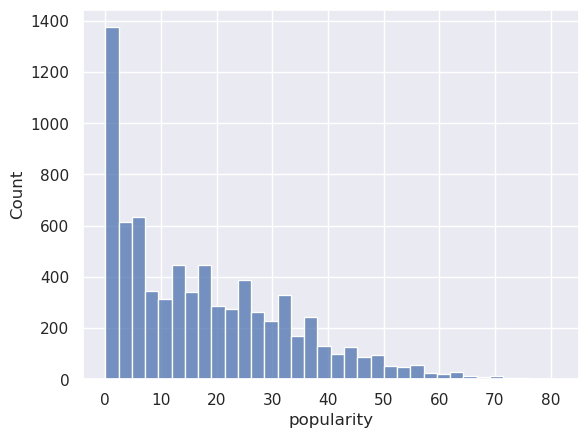

In [51]:
#creating a histogram to see distribution of popularity scores in the dataset.
sns.histplot(df['popularity'], bins='auto')

#### Top 100 Songs
In order to better decide what's popular, we can take a look at the Top 100 songs' popularity scores from a playlist that  contains top 100 popular songs by african artist created by a spotify [user](https://open.spotify.com/playlist/1C9vnCyBuQykXAe2U1EcHW?si=kEjb6Rj2R7ahxdbeoFY94A&pi=e-FwFOr-nyTmSg).

In [52]:
df_100 = pd.read_csv('data/top_100_african_hits.csv')

In [53]:
df_100['popularity'].describe()

count    100.000000
mean      38.860000
std       20.584892
min        0.000000
25%       30.500000
50%       42.500000
75%       51.250000
max       78.000000
Name: popularity, dtype: float64

<Axes: xlabel='popularity', ylabel='Count'>

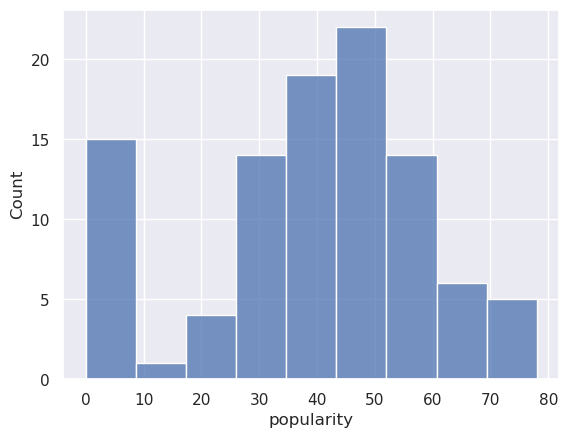

In [54]:
fig, ax = plt.subplots()
sns.histplot(df_100['popularity'], bins='auto', ax=ax)

From the above histogram we see that we have a bimodal distribution. One of the peaks is around 5, and the other one seems to be around 45.

In [55]:
df_100['popularity'].describe()['50%']      # Median value

42.5

We will be defining a song being popular as being African Top 100 worthy and therefore we will establish our cutoff point at the median value (42.5)

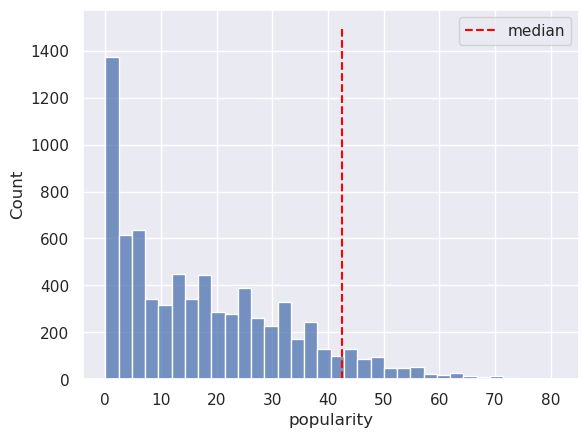

In [56]:
# Visualizing the meadian popularity scores on the overall dataset histogram
fig, ax = plt.subplots()
sns.histplot(df['popularity'], bins='auto', ax=ax)
ax.vlines(x=df_100['popularity'].describe()['50%'], ymin=0, ymax=1500, linestyles='dashed', colors='red', label='median')
plt.legend()

In [57]:
#creating is_popular column with our cutoff point
df['is_popular']=(df['popularity']>=42.5).astype('int')
df.head()

,track_name,track_id,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise,is_popular
0,Bandana,2qWwuCVeMjF9mUT0S5Iqvl,Playboy,Fireboy DML,2022-08-04,178225.0,73.0,0.818,1.0,0.293,1.0,0.605,0.011600,0.0696,-7.121,0.0380,104.931,4.0,0.366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,All Of Us (Ashawo),6459gZKddpOoPIH8PAcCwS,Playboy,Fireboy DML,2022-08-04,183349.0,62.0,0.605,11.0,0.304,1.0,0.813,0.003300,0.1320,-6.416,0.0903,199.837,4.0,0.748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,Playboy,2gGAyatRqjjx3DOmLGI12W,Play Boy,Daddy Lumba,1992-10-05,316440.0,16.0,0.732,11.0,0.225,1.0,0.797,0.138000,0.2650,-10.205,0.0671,115.015,4.0,0.972,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Adore (feat. euro),3ouP8HFixJmafK7hd1wJ0q,Playboy,Fireboy DML,2022-08-04,201826.0,42.0,0.709,0.0,0.108,1.0,0.511,0.000019,0.1410,-6.972,0.1490,199.775,4.0,0.785,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sofri,6S5XNauc7v8FLJWEIk0z2c,Playboy,Fireboy DML,2022-08-04,179246.0,47.0,0.745,6.0,0.341,1.0,0.580,0.002610,0.1270,-5.596,0.0780,196.078,4.0,0.927,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [58]:
#dropping popularity score column since we will not be using it
df.drop(['popularity', 'artist_name', 'track_name', 'album_name', 'release_date'], axis=1, inplace=True)
df.set_index('track_id', inplace=True)    # Set the 'track_id' column as the index
df.head()

,duration_ms,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise,is_popular
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2qWwuCVeMjF9mUT0S5Iqvl,178225.0,0.818,1.0,0.293,1.0,0.605,0.011600,0.0696,-7.121,0.0380,104.931,4.0,0.366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6459gZKddpOoPIH8PAcCwS,183349.0,0.605,11.0,0.304,1.0,0.813,0.003300,0.1320,-6.416,0.0903,199.837,4.0,0.748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2gGAyatRqjjx3DOmLGI12W,316440.0,0.732,11.0,0.225,1.0,0.797,0.138000,0.2650,-10.205,0.0671,115.015,4.0,0.972,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3ouP8HFixJmafK7hd1wJ0q,201826.0,0.709,0.0,0.108,1.0,0.511,0.000019,0.1410,-6.972,0.1490,199.775,4.0,0.785,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6S5XNauc7v8FLJWEIk0z2c,179246.0,0.745,6.0,0.341,1.0,0.580,0.002610,0.1270,-5.596,0.0780,196.078,4.0,0.927,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


We dropped popularity scores since we already binarized that column, but additionally we are dropping `'artist_name'`, `'track_name'`, `'album_name'`, and `'release_date'` since we are looking at the anatomy of a song and not who sings it, what it's called or when it was released. The goal is to identify songs that will become popular without being affected by the artist's name since we would also like to find songs from up-and-coming artists.

#### One Hot Encoding the Categorical Columns
We still have categorical columns that need one hot encoding. Namely, these columns are `key`, `mode` and `time_signature`.

In [59]:
# Check to see how many more columns we will be creating by OHE the cat_cols.
df.nunique()

duration_ms         6891
danceability         700
key                   12
acousticness        2023
mode                   2
energy               899
instrumentalness    2769
liveness            1392
loudness            5447
speechiness         1207
tempo               6342
time_signature         5
valence              934
zilizopendwa           2
hiplife                2
xhosa                  2
afrobeats              2
house                  2
soul                   2
afropop                2
world                  2
kwaito                 2
soukous                2
hip hop                2
jazz                   2
ndombolo               2
azontobeats            2
pop                    2
rumba congolaise       2
is_popular             2
dtype: int64

In [60]:
df.nunique()['mode']

2

In [61]:
df.nunique()['time_signature']

5

In [62]:
df.nunique()['key']

12

We will be creating additional 16 columns ---> 2 (mode) + 5 (time_signature) + 12 (key) - 3 (We'll drop first column of each encoded category) 

In [63]:
# Define categorical columns
cat_cols = ['key', 'mode', 'time_signature']

In [64]:
# One hot encoding the dataframes
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

df_ohe = encoder.fit_transform(df[cat_cols])
df_ohe = pd.DataFrame(df_ohe, columns=encoder.get_feature_names_out(cat_cols), index=df.index)
df_ohe.head()

,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_1.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
track_id,,,,,,,,,,,,,,,,
2qWwuCVeMjF9mUT0S5Iqvl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6459gZKddpOoPIH8PAcCwS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2gGAyatRqjjx3DOmLGI12W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3ouP8HFixJmafK7hd1wJ0q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6S5XNauc7v8FLJWEIk0z2c,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [65]:
df_ohe.shape

(7503, 16)

In [66]:
# Merging OHE columns with numerical columns
df = pd.concat([df.drop(cat_cols, axis=1), df_ohe], axis=1)
df.tail()

,duration_ms,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise,is_popular,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_1.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5JB0EcpkbUsyaU9EvzK3bw,236202.0,0.651,0.112,0.707,0.000000,0.0894,-4.835,0.1230,101.011,0.314,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
0dXCiV6LK9YkpBP5lbFiD4,139080.0,0.529,0.672,0.526,0.000000,0.4190,-7.153,0.1640,102.196,0.568,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2U5vPEm0m58dY8DCmKx1hr,197041.0,0.835,0.466,0.590,0.001660,0.1690,-8.347,0.0942,106.004,0.683,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2HfK1KumDffDWPZga46Hmw,156781.0,0.519,0.415,0.713,0.000507,0.1230,-5.497,0.2320,202.034,0.518,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6NuG2JgERZZXvvjmtjOFix,251147.0,0.838,0.347,0.707,0.000029,0.1130,-5.533,0.0449,100.980,0.630,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:
df.columns

Index(['duration_ms', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'zilizopendwa', 'hiplife', 'xhosa', 'afrobeats', 'house',
       'soul', 'afropop', 'world', 'kwaito', 'soukous', 'hip hop', 'jazz',
       'ndombolo', 'azontobeats', 'pop', 'rumba congolaise', 'is_popular',
       'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0',
       'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'mode_1.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0'],
      dtype='object')

### Train Test Split

In [68]:
df.shape

(7503, 43)

In [69]:
# Splitting the data to training and test sets in order to be able to measure performance
from sklearn.model_selection import train_test_split
y=df['is_popular']
X=df.drop('is_popular', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

With both the X_train and X_test dataframes cleaned and one hot encoded we can move onto the modelling process.

## Models
The first model we will be generating is a dummy classifier. We will be comparing our models' success to each other but also to this baseline model.

### Model 0 - Baseline - Dummy Classifier

In [70]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(random_state=42)
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)

We need a function that will show us the classification report, the confusion matrix as well as the ROC curve to be able to evaluate our models.

In [71]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

def classification(y_true, y_pred, X, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.
    
    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X: X_test values"""
    
    #Classification report
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred, zero_division=0))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y_true, cmap='Blues', normalize='true', ax=ax[0])
    ax[0].grid(False)
    
    # Plotting the ROC curve
    RocCurveDisplay.from_estimator(estimator=clf, X=X, y=y_true, ax=ax[1])
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange',)

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1038
           1       0.00      0.00      0.00        88

    accuracy                           0.92      1126
   macro avg       0.46      0.50      0.48      1126
weighted avg       0.85      0.92      0.88      1126



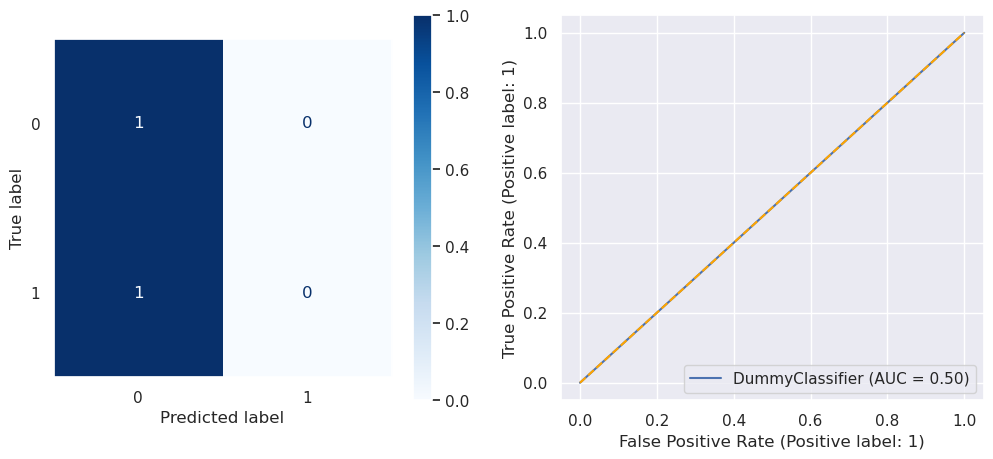

In [72]:
classification(y_test, y_pred, X_test, clf_dummy)

This plot above consists of two key visualizations evaluating a Dummy Classifier in a classification task:

1. Confusion Matrix (Left Plot): The model predicts only one class (label 0) for all instances, completely ignoring label 1. This suggests a non-informative model.

2. ROC Curve (Right Plot): The diagonal line indicates random guessing, with an AUC (Area Under Curve) of 0.50, which confirms that the Dummy Classifier has no predictive power.

### Addressing Class Imbalance with SMOTENC

In [73]:
# Class imbalance percentages
y_train.value_counts(normalize=True)

is_popular
0    0.923475
1    0.076525
Name: proportion, dtype: float64

We clearly have a class imbalance problem where approximately 93% of our data is **not** popular and only about 7% of it is. To address this we can SMOTE the training data and see if training a model with this method would improve our results.

In [74]:
X.head()

,duration_ms,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,zilizopendwa,hiplife,xhosa,afrobeats,house,soul,afropop,world,kwaito,soukous,hip hop,jazz,ndombolo,azontobeats,pop,rumba congolaise,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_1.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2qWwuCVeMjF9mUT0S5Iqvl,178225.0,0.818,0.293,0.605,0.011600,0.0696,-7.121,0.0380,104.931,0.366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6459gZKddpOoPIH8PAcCwS,183349.0,0.605,0.304,0.813,0.003300,0.1320,-6.416,0.0903,199.837,0.748,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2gGAyatRqjjx3DOmLGI12W,316440.0,0.732,0.225,0.797,0.138000,0.2650,-10.205,0.0671,115.015,0.972,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3ouP8HFixJmafK7hd1wJ0q,201826.0,0.709,0.108,0.511,0.000019,0.1410,-6.972,0.1490,199.775,0.785,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6S5XNauc7v8FLJWEIk0z2c,179246.0,0.745,0.341,0.580,0.002610,0.1270,-5.596,0.0780,196.078,0.927,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [75]:
# Looking at column names to determine the position of the categorical/binarized columns and extract the column indices for SMOTENC
X_train.columns

Index(['duration_ms', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'zilizopendwa', 'hiplife', 'xhosa', 'afrobeats', 'house',
       'soul', 'afropop', 'world', 'kwaito', 'soukous', 'hip hop', 'jazz',
       'ndombolo', 'azontobeats', 'pop', 'rumba congolaise', 'key_1.0',
       'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0',
       'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'mode_1.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0'],
      dtype='object')

In [76]:
# creating a list of categorical column indices
cat_cols = list(range(10, len(X_train.columns)))
X_train.columns[cat_cols]

Index(['zilizopendwa', 'hiplife', 'xhosa', 'afrobeats', 'house', 'soul',
       'afropop', 'world', 'kwaito', 'soukous', 'hip hop', 'jazz', 'ndombolo',
       'azontobeats', 'pop', 'rumba congolaise', 'key_1.0', 'key_2.0',
       'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0',
       'key_9.0', 'key_10.0', 'key_11.0', 'mode_1.0', 'time_signature_1.0',
       'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0'],
      dtype='object')

In [77]:
# pip install imblearn --user

In [78]:
import imblearn

In [79]:
# Using SMOTENC to address class imbalance. We are not using SMOTE since we have categorical columns.
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=cat_cols, random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

is_popular
0    0.5
1    0.5
Name: proportion, dtype: float64

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1038
           1       0.00      0.00      0.00        88

    accuracy                           0.92      1126
   macro avg       0.46      0.50      0.48      1126
weighted avg       0.85      0.92      0.88      1126



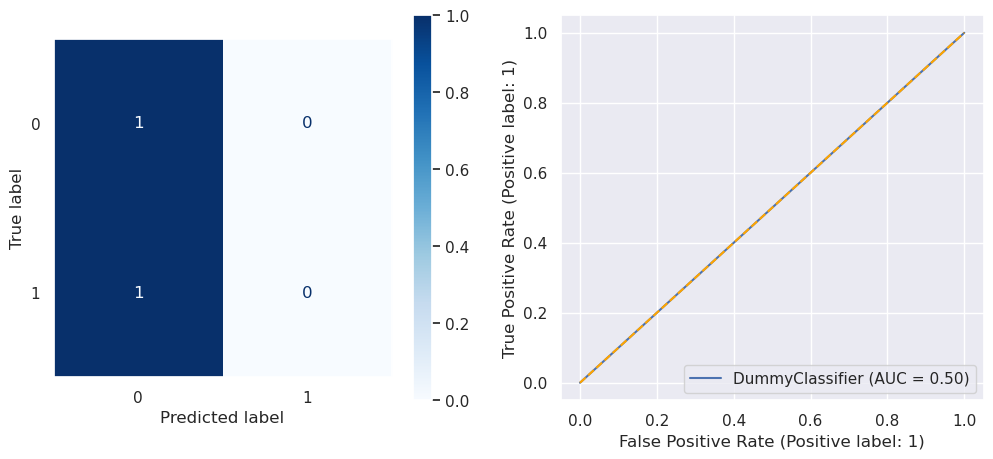

In [80]:
# Re-fitting the Dummy Classifier without the class imbalance problem
clf_dummy_sm = DummyClassifier(random_state=42)
clf_dummy_sm.fit(X_train_sm, y_train_sm)
y_pred = clf_dummy_sm.predict(X_test)
classification(y_test, y_pred, X_test, clf_dummy_sm)

The Dummy Classifier provides a baseline for comparison by making simple predictions, often based on class distribution. Here, it fails to distinguish between classes, achieving an AUC of 0.50, meaning it performs no better than random chance.

In [81]:
from sklearn.metrics import recall_score

df_results = pd.DataFrame(columns=['Model Name', 'Recall Score'])

def add_results(df, model_name, model, X_test, y_test):
    """
    Adds recall score to df_results for a given model.
    
    Parameters:
    - model_name: Name of the model (string).
    - model: Trained model object.
    - X_test: Test features.
    - y_test: True labels.
    - df: DataFrame to store results.
    
    Returns:
    - Updated DataFrame with new recall score.
    """
    # Get predictions from the model
    if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
        y_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    
    # Compute recall score
    recall = round(recall_score(y_test, y_pred), 2)
    
    # Add results to DataFrame
    # Check if model name is already exist and update
    if model_name in df["Model Name"].array:
        ind = df["Model Name"].index[df["Model Name"] == model_name][0] # Get the index of the existing model name
        print(f"Model name '{model_name}' already exist, updating value...")
        df.loc[ind] = [model_name, recall]  
    else:
        df.loc[len(df)] = [model_name, recall]
    
    return df


In [82]:
df_results = add_results(df_results, 'Dummy Classifier', clf_dummy_sm, X_test, y_test)
df_results.head()

,Model Name,Recall Score
0,Dummy Classifier,0.0


### Model 1 - Random Forest Classifier
The first model we will be developing is the Random Forest classifier.


#### Initial Model

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1038
           1       0.44      0.32      0.37        88

    accuracy                           0.92      1126
   macro avg       0.69      0.64      0.66      1126
weighted avg       0.90      0.92      0.91      1126



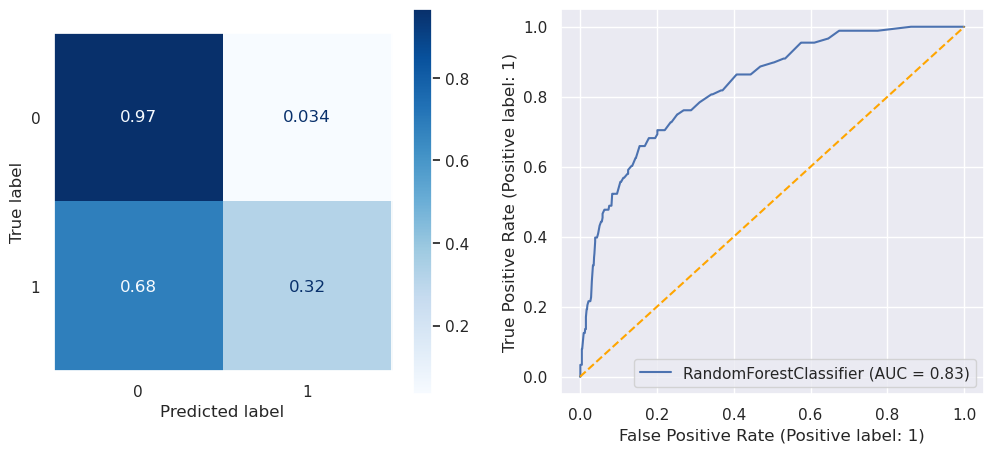

In [83]:
# Fitting RF Classifier to SMOTE'ed data
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_sm, y_train_sm)

#Making predictions and evaluation.
y_pred = clf_rf.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf)

The model may be underfitting, so to confirm we will look at the performance of the model with the training data.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5889
           1       1.00      1.00      1.00      5889

    accuracy                           1.00     11778
   macro avg       1.00      1.00      1.00     11778
weighted avg       1.00      1.00      1.00     11778



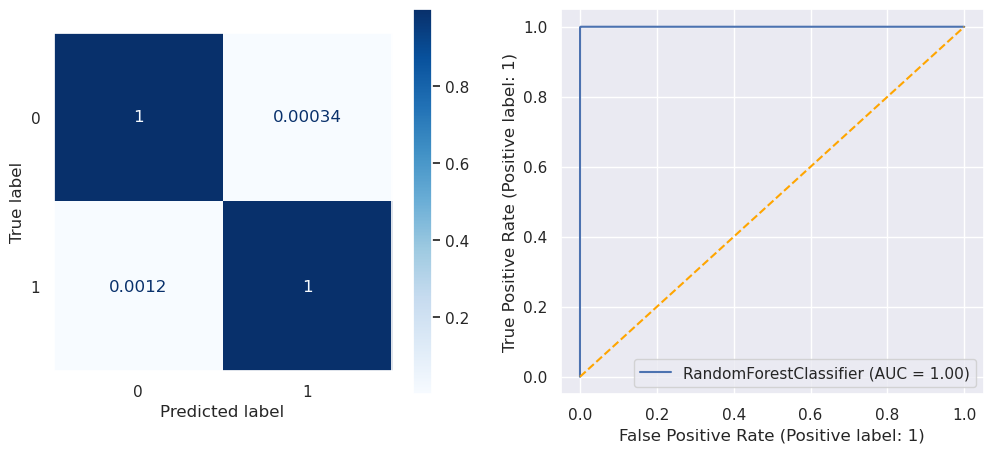

In [84]:
# Evaluating the model performance for the training data
y_pred = clf_rf.predict(X_train_sm)
classification(y_train_sm, y_pred, X_train_sm, clf_rf)

Our model is performing perfectly on the training data but not so much on the test data since it is overfitting to the training set. We need to tune our model to get more accurate results on unseen data. We will be using a grid search to optimize for the recall score. We are optimizing recall instead of other scores since we primarily care about correctly identifying a song that will be popular and we don't mind if we pick a few songs that don't end up becoming popular.

#### Hyperparameter Tuning

In [85]:
# from sklearn.model_selection import GridSearchCV

# clf = RandomForestClassifier()
# grid = {'criterion': ['gini', 'entropy'], 
#         'max_depth': [4, 5, 6],
#         'min_samples_leaf': [3, 4, 5, 6, 7]
#        }

# gridsearch = GridSearchCV(estimator=clf, param_grid=grid, scoring='recall', n_jobs=-1, verbose=2)

# gridsearch.fit(X_train_sm,  y_train_sm)
# gridsearch.best_params_
# #Results: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3}

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1038
           1       0.27      0.61      0.37        88

    accuracy                           0.84      1126
   macro avg       0.61      0.74      0.64      1126
weighted avg       0.91      0.84      0.86      1126



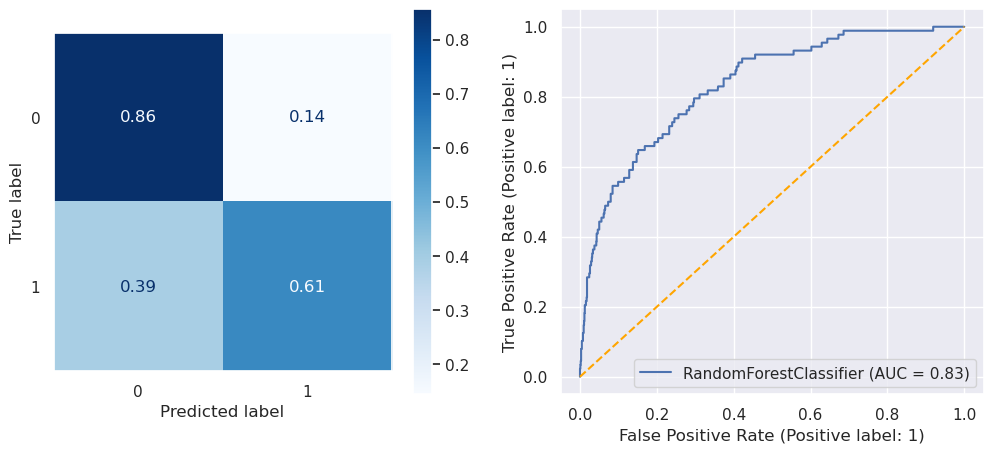

In [86]:
clf_rf_tuned = RandomForestClassifier(criterion='gini', max_depth=6, 
                                      min_samples_leaf=3, class_weight='balanced', 
                                      random_state=42
                                     )

clf_rf_tuned.fit(X_train_sm, y_train_sm)

y_pred = clf_rf_tuned.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf_tuned)

In [87]:
# Appending the recall score to the results dataframe
df_results = add_results(df_results, 'Random Forest', clf_rf_tuned, X_test, y_test)
df_results.head()

,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.61


### Model 2 - LogisticRegressionCV
Since Logistic Regression models are potentially sensitive to outliers and need scaled data we will need to process our data one more time to remove outliers and scale it.

#### Removing Outliers

In [88]:
#separating out the numerical columns for outlier removal
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
num_cols

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [89]:
# Concatenating the training and testing sets together for outlier removal
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [90]:
#Outlier Removal with the IQR method

def find_outliers_IQR(data, return_limits = False):
    """Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of 1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:    
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series, or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
    
    Adapted from Flatiron School Phase #2 Py Files.
    URL = https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/py_files/functions_SG.py
    
    """
    df_b = data.copy()
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR
    
    if return_limits:
        return lower_limit, upper_limit
    
    else:
        idx_outs = (df_b > upper_limit) | (df_b < lower_limit)
        return idx_outs

In [91]:
#finding and removing outliers based on X_train (df_train) to avoid data leakage

original_length_train = len(df_train)
original_length_test = len(df_test)

for col in num_cols:
   
    lower_limit, upper_limit = find_outliers_IQR(df_train[col], return_limits=True)
    
    df_train = df_train[(df_train[col] >= lower_limit) & (df_train[col] <= upper_limit)]
    df_test = df_test[(df_test[col] >= lower_limit) & (df_test[col] <= upper_limit)]

print(f'{original_length_train - len(df_train)} outliers removed from training set')
print(f'{original_length_test - len(df_test)} outliers removed from test set')

2406 outliers removed from training set
417 outliers removed from test set


In [92]:
# Separating out the X and y values for training and test sets
y_train = df_train['is_popular']
X_train = df_train.drop('is_popular', axis=1)

y_test = df_test['is_popular']
X_test = df_test.drop('is_popular', axis=1)

#### Addressing Class Imbalance with SMOTENC

In [93]:
y_train.value_counts(normalize=True)

is_popular
0    0.910854
1    0.089146
Name: proportion, dtype: float64

Once again our data has a class imbalance issue so we will be using SMOTENC to address this.

In [94]:
X_train.columns

Index(['duration_ms', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'zilizopendwa', 'hiplife', 'xhosa', 'afrobeats', 'house',
       'soul', 'afropop', 'world', 'kwaito', 'soukous', 'hip hop', 'jazz',
       'ndombolo', 'azontobeats', 'pop', 'rumba congolaise', 'key_1.0',
       'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0',
       'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'mode_1.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0'],
      dtype='object')

In [95]:
cat_cols = list(range(10, len(X_train.columns)))


In [96]:
sm = SMOTENC(categorical_features=cat_cols, random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

is_popular
0    0.5
1    0.5
Name: proportion, dtype: float64

#### Scaling the Data

In [97]:
# Using Standard Scaler to scale the smote'd data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sm_sc = scaler.fit_transform(X_train_sm)
X_test_sc = scaler.transform(X_test)

#### Initial Model

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       652
           1       0.17      0.18      0.17        57

    accuracy                           0.86       709
   macro avg       0.55      0.55      0.55       709
weighted avg       0.87      0.86      0.87       709



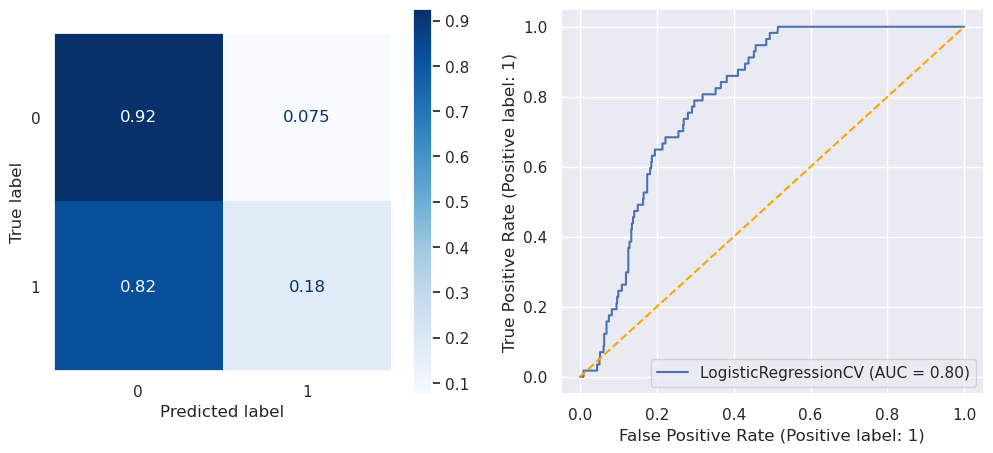

In [98]:
from sklearn.linear_model import LogisticRegressionCV
clf_logregcv = LogisticRegressionCV(cv=5, max_iter=500, random_state=42)
clf_logregcv.fit(X_train_sm_sc,  y_train_sm)
y_pred = clf_logregcv.predict(X_test_sc)
classification(y_test, y_pred, X_test_sc, clf_logregcv)

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3617
           1       0.91      0.90      0.91      3617

    accuracy                           0.91      7234
   macro avg       0.91      0.91      0.91      7234
weighted avg       0.91      0.91      0.91      7234



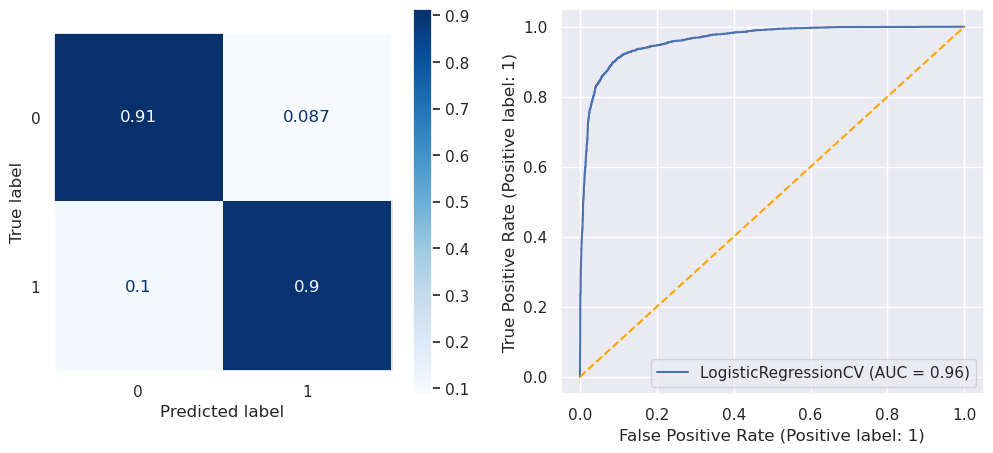

In [99]:
#Evaluating the model performance for the training data
y_pred = clf_logregcv.predict(X_train_sm_sc)
classification(y_train_sm, y_pred, X_train_sm_sc, clf_logregcv)

Our model is once again overfitting to the training data and performing very well on it but the model's performance drops significantly when we test it with the test data. In order to address this, we can once again perform a grid search and try to tune the model.

#### Hyperparameter Tuning

In [100]:
# clf = LogisticRegressionCV(cv=5)
# grid = {'class_weight': ['balanced', None],
#         'penalty':['l1', 'l2'],
#         'solver':['liblinear'],
#         'Cs': [10, 1]
#        }

# gridsearch = GridSearchCV(estimator=clf, param_grid = grid, scoring='recall', n_jobs=-1, verbose=2)

# gridsearch.fit(X_train_sm_sc,  y_train_sm)
# gridsearch.best_params_
# # {'Cs': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

The grid search returned 'l2' as the regularization method which is the Ridge regularization as well as a C value of 1. We will use these parameters on a new model to see if the recall score improves.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       652
           1       0.20      0.81      0.32        57

    accuracy                           0.72       709
   macro avg       0.59      0.76      0.57       709
weighted avg       0.91      0.72      0.78       709



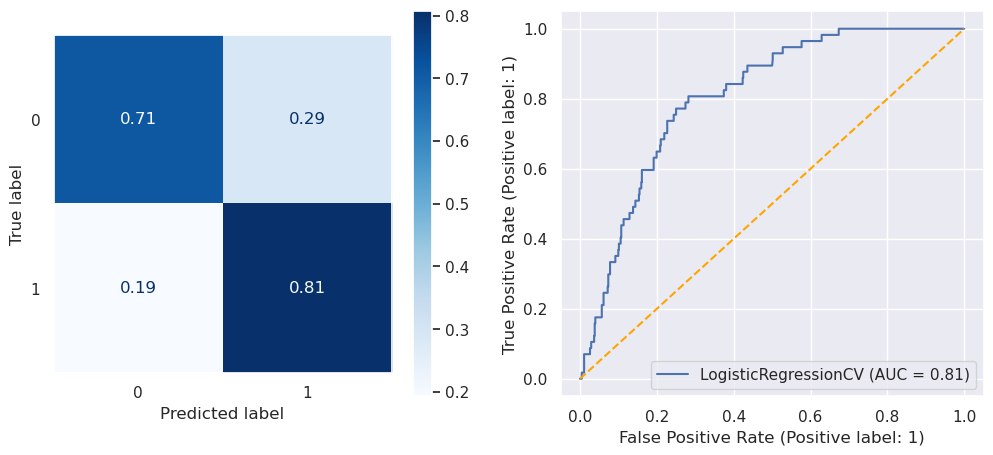

In [101]:
clf_logregcv_tuned = LogisticRegressionCV(cv=5, class_weight='balanced', Cs=1, 
                                          penalty='l2', solver='liblinear',
                                          max_iter=500, random_state=42)
clf_logregcv_tuned.fit(X_train_sm_sc,  y_train_sm)
y_pred = clf_logregcv_tuned.predict(X_test_sc)
classification(y_test, y_pred, X_test_sc, clf_logregcv_tuned)

In [102]:
# Appending the recall score to the results dataframe
df_results = add_results(df_results, 'Logistic Regression', clf_logregcv_tuned, X_test=X_test_sc, y_test=y_test)
df_results.head()

,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.61
2,Logistic Regression,0.81


### Model 3 - XGBOost

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 12, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       652
           1       0.23      0.72      0.35        57

    accuracy                           0.79       709
   macro avg       0.60      0.76      0.61       709
weighted avg       0.91      0.79      0.83       709



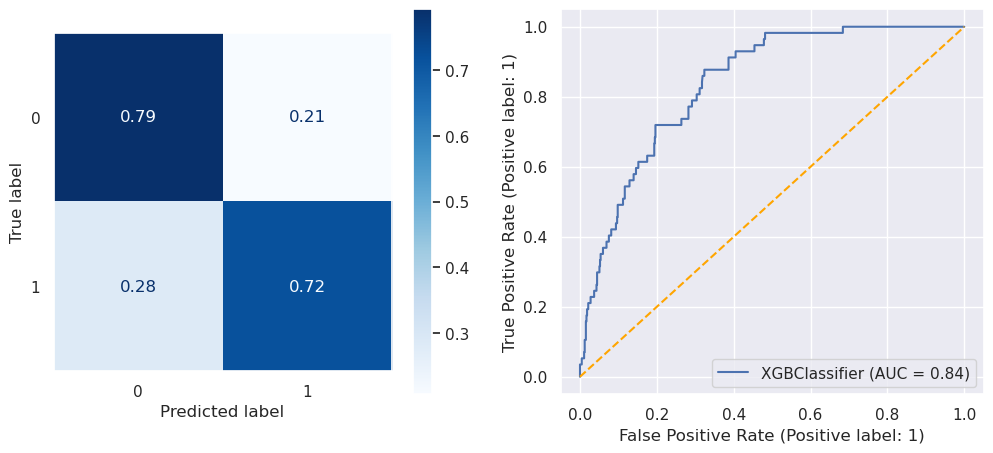

In [103]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Parameter grid
param_grid = {
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 200, 500],  
    "max_depth": [3, 4, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "scale_pos_weight": [10, 12, 15], 
}

#  Model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr"  
)
# RandomizedSearchCV tuning
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,  # Try 10 random combinations
    scoring="roc_auc",
    cv=5,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Predict on test set
xgb_tuned = random_search.best_estimator_
y_pred = xgb_tuned.predict(X_test)

#  Final evaluation
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

classification(y_test, y_pred, X_test, xgb_tuned)

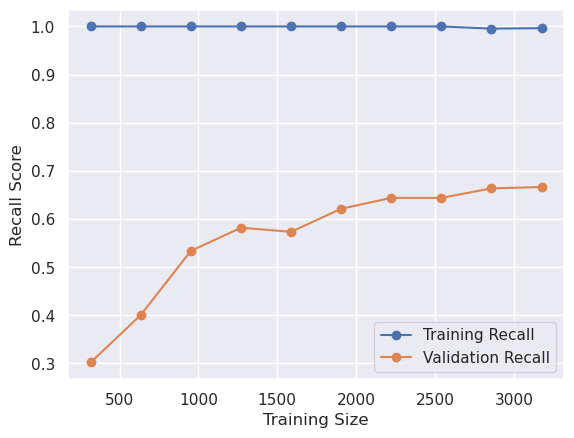

In [104]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_tuned, X_train, y_train, cv=5, scoring="recall", train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training Recall")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Validation Recall")
plt.xlabel("Training Size")
plt.ylabel("Recall Score")
plt.legend()
plt.show()

The initial tuning with `RandomizedSearchCV` showed overfitting, with a large gap between training and validation recall. To reduce overfitting, we will manually adjust `scale_pos_weight`, `learning_rate`, `max_depth`, `n_estmators`, `min_child_weight`, and `subsample`.  The goal is to increase validation recall while narrowing the training-validation recall gap.

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       652
           1       0.19      0.79      0.31        57

    accuracy                           0.71       709
   macro avg       0.58      0.75      0.56       709
weighted avg       0.91      0.71      0.78       709



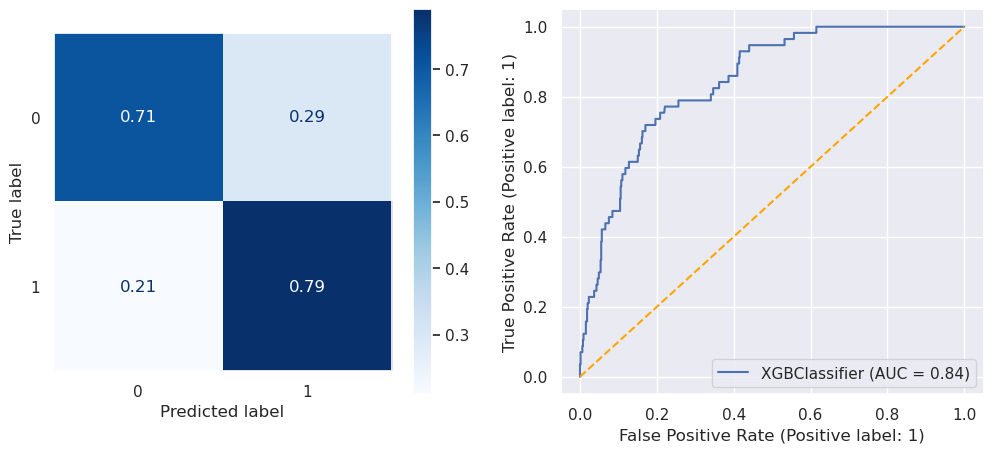

In [105]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve

# Compute class imbalance ratio
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # Increase weight for popular songs

# Define the XGBoost model with recall-focused settings
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.005,  # Lower for better generalization
    n_estimators=500,  # More trees to improve learning
    max_depth=3,   # Slightly shallower to avoid overfitting
    min_child_weight=5,
    subsample=0.8,  # Keep training diverse
    colsample_bytree=0.8,  # More features per tree
    random_state=42,
    eval_metric='logloss' 
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred = xgb_model.predict(X_test)

# Print performance metrics
classification(y_test, y_pred, X_test, xgb_model)

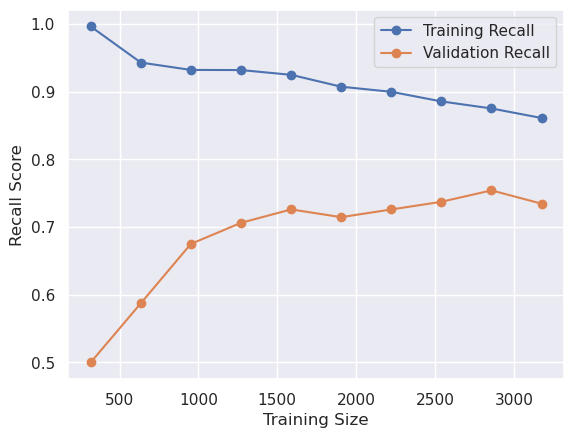

In [106]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring="recall", train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training Recall")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Validation Recall")
plt.xlabel("Training Size")
plt.ylabel("Recall Score")
plt.legend()
plt.show()


The training and validation recall curve are closer compared to earlier

In [107]:
# Appending the recall score to the results dataframe
df_results = add_results(df_results, 'xgb', xgb_model, X_test, y_test)
df_results.head()

,Model Name,Recall Score
0,Dummy Classifier,0.00
1,Random Forest,0.61
2,Logistic Regression,0.81
3,xgb,0.79


## Understanding Model Decision Patterns
With three optimized models at our disposal, the next step is to uncover the reasoning behind their predictions. By analyzing feature importances, we can determine which attributes played a crucial role in classifying songs as popular or unpopular. Comparing these insights across models will help identify shared influential factors, providing a deeper understanding of the key elements driving song popularity. This analysis can also highlight differences in how each model prioritizes features, offering valuable insights into their decision-making processes.

### Feature Importances

#### Random Forest

In [108]:
# Accessing feature importance values of the tuned random forest model and sorting them
rf_importances_df = pd.Series(clf_rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Parsing the series to a dataframe
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['RF-Attribute', 'RF-Importance']
rf_importances_df

,RF-Attribute,RF-Importance
0,afrobeats,0.235356
1,duration_ms,0.078874
2,pop,0.062613
3,afropop,0.057019
4,rumba congolaise,0.054605
5,acousticness,0.047414
6,jazz,0.046208
7,energy,0.045351
8,danceability,0.039230
9,soukous,0.034644


#### Logistic Regresson

In [109]:
#accessing feature importance values of the tuned logistic regression model and sorting them
logregcv_importances_df = pd.Series(clf_logregcv_tuned.coef_[0], index=X_train.columns).sort_values(ascending=False)
#parsing the series to a dataframe
logregcv_importances_df = logregcv_importances_df.reset_index()
logregcv_importances_df.columns = ['LogReg-Attribute', 'LogReg-Importance']
logregcv_importances_df

,LogReg-Attribute,LogReg-Importance
0,afrobeats,0.096934
1,pop,0.077400
2,danceability,0.055383
3,hip hop,0.053179
4,time_signature_4.0,0.026080
5,instrumentalness,0.011555
6,speechiness,0.011142
7,loudness,0.000128
8,azontobeats,-0.009186
9,time_signature_1.0,-0.011865


#### XGBoost

In [110]:
# Accessing feature importance values of the tuned random forest model and sorting them
xgb_importances_df = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Parsing the series to a dataframe
xgb_importances_df = xgb_importances_df.reset_index()
xgb_importances_df.columns = ['XGB-Attribute', 'XGB-Importance']
xgb_importances_df

,XGB-Attribute,XGB-Importance
0,afrobeats,0.156353
1,soukous,0.055920
2,jazz,0.053715
3,world,0.050915
4,duration_ms,0.045947
5,hip hop,0.044887
6,energy,0.041057
7,hiplife,0.041020
8,afropop,0.039293
9,danceability,0.034772


In [111]:
#Concatenating feature importances into a single dataframe
importances_df = pd.concat([rf_importances_df, logregcv_importances_df, xgb_importances_df], axis=1)
importances_df

,RF-Attribute,RF-Importance,LogReg-Attribute,LogReg-Importance,XGB-Attribute,XGB-Importance
0,afrobeats,0.235356,afrobeats,0.096934,afrobeats,0.156353
1,duration_ms,0.078874,pop,0.077400,soukous,0.055920
2,pop,0.062613,danceability,0.055383,jazz,0.053715
3,afropop,0.057019,hip hop,0.053179,world,0.050915
4,rumba congolaise,0.054605,time_signature_4.0,0.026080,duration_ms,0.045947
5,acousticness,0.047414,instrumentalness,0.011555,hip hop,0.044887
6,jazz,0.046208,speechiness,0.011142,energy,0.041057
7,energy,0.045351,loudness,0.000128,hiplife,0.041020
8,danceability,0.039230,azontobeats,-0.009186,afropop,0.039293
9,soukous,0.034644,time_signature_1.0,-0.011865,danceability,0.034772


### Feature Importance Comparison

Text(0.5, 1.0, 'Feature Importances: XGBoost')

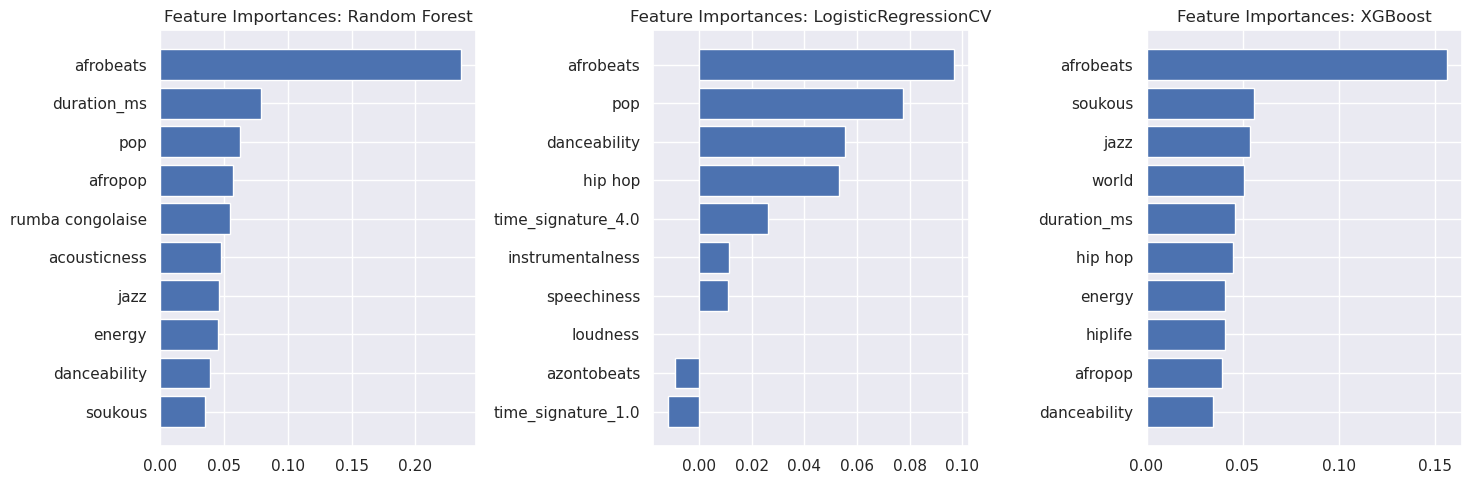

In [112]:
# Plotting feature importances for all models for comparison

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

rf_importances_df = rf_importances_df.sort_values(by='RF-Importance', ascending=True).tail(10)
ax[0].barh(rf_importances_df['RF-Attribute'], rf_importances_df['RF-Importance'])
ax[0].set_title('Feature Importances: Random Forest')

logregcv_importances_df = logregcv_importances_df.sort_values(by='LogReg-Importance', ascending=True).tail(10)
ax[1].barh(logregcv_importances_df['LogReg-Attribute'], logregcv_importances_df['LogReg-Importance'])
ax[1].set_title('Feature Importances: LogisticRegressionCV')
plt.tight_layout()

xgb_importances_df = xgb_importances_df.sort_values(by='XGB-Importance', ascending=True).tail(10)
ax[2].barh(xgb_importances_df['XGB-Attribute'], xgb_importances_df['XGB-Importance'])
ax[2].set_title('Feature Importances: XGBoost')



The feature importance analysis shows that all three models prioritize "afrobeats" as the most influential feature. However, Logistic Regression incorporates additional musical characteristics like "danceability", "time signature", "speechiness", "instrumentalness" and "loudness", suggesting a broader reliance on both genre and musical properties. In contrast, Random Forest and XGBoost focus more on genre-based features such as "pop," "rumba congolaise," "soukous," and "jazz." This distinction implies that Logistic Regression may be more sensitive to subtle audio characteristics, while tree-based models emphasize categorical influences. The variation in feature importance suggests that different models interpret the dataset differently, which can impact their predictive performance and generalization. Ultimately, the choice between models depends on whether genre or broader musical attributes better capture the patterns in the data.

<BarContainer object of 42 artists>

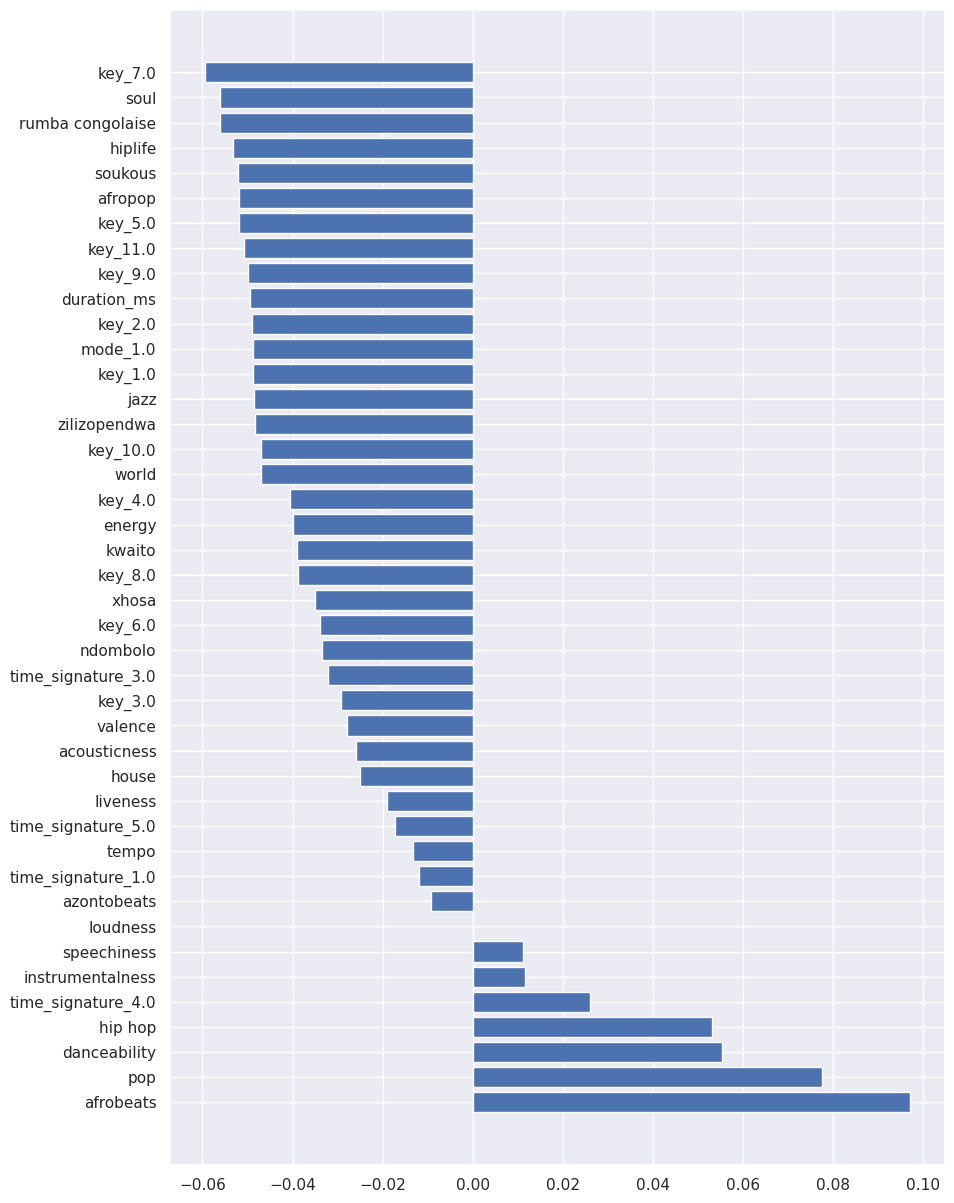

In [113]:
logregcv_importances_df = pd.Series(clf_logregcv_tuned.coef_[0], index=X_train.columns).sort_values(ascending=False)

# Parsing the series to a dataframe
logregcv_importances_df = logregcv_importances_df.reset_index()
logregcv_importances_df.columns = ['Attribute', 'Importance']

fig, ax = plt.subplots(figsize=(10,15))
ax.barh(logregcv_importances_df['Attribute'], logregcv_importances_df['Importance'])

We can see here that while certain features like 'afrobeats', 'pop', and 'danceability' positively affected the prediction, other features such as 'rumba congolaise', 'soul' and 'key_11 (or Key_B)' negatively affected it in the case of logistic regression. Next we can dive into our processed dataframe and explore some of these attributes for popular and unpopular songs to come to conclusions.

### Exploring Track Features and Popularity
In this section, we examine how track features such as `'danceability'`, `'speechiness'`, and `'instrumentalness'` influence popularity, independent of genre classifications with reference to the definitions provided in the Spotify [documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).

#### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [114]:
# Separating popular and unpopular songs to two dfs
popular_songs_df = df[df['is_popular'] == 1]
unpopular_songs_df = df[df['is_popular']==0]

In [115]:
# Removing outliers from danceability scores and separating them to Series for popular and unpopular songs
popular_dance_clean = popular_songs_df[find_outliers_IQR(popular_songs_df['danceability'])==False]
print(popular_dance_clean['danceability'].describe())

unpopular_dance_clean = unpopular_songs_df[find_outliers_IQR(unpopular_songs_df['danceability'])==False]
print(unpopular_dance_clean['danceability'].describe())

count    574.000000
mean       0.729172
std        0.117489
min        0.394000
25%        0.647250
50%        0.750000
75%        0.820000
max        0.956000
Name: danceability, dtype: float64
count    6912.000000
mean        0.656242
std         0.141828
min         0.231000
25%         0.550000
50%         0.672000
75%         0.766000
max         0.985000
Name: danceability, dtype: float64


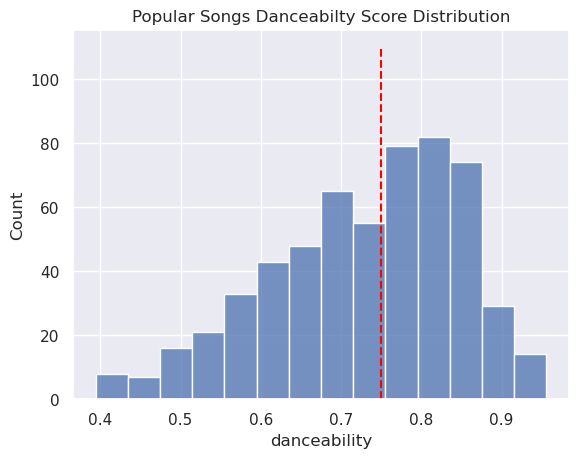

In [116]:
sns.histplot(data=popular_dance_clean, x='danceability', bins='auto')
plt.title('Popular Songs Danceabilty Score Distribution')
plt.vlines(x=popular_dance_clean['danceability'].median(), ymin=0, ymax=110, color='red', ls='--')

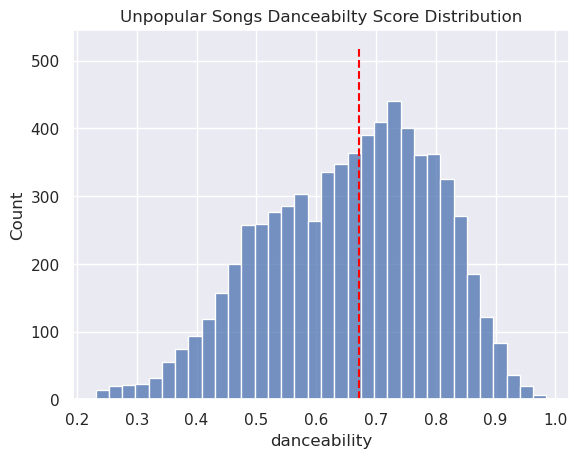

In [117]:
sns.histplot(data=unpopular_dance_clean, x='danceability', bins='auto')
plt.title('Unpopular Songs Danceabilty Score Distribution')
plt.vlines(x=unpopular_dance_clean['danceability'].median(), ymin=0, ymax=520, color='red', ls='--')

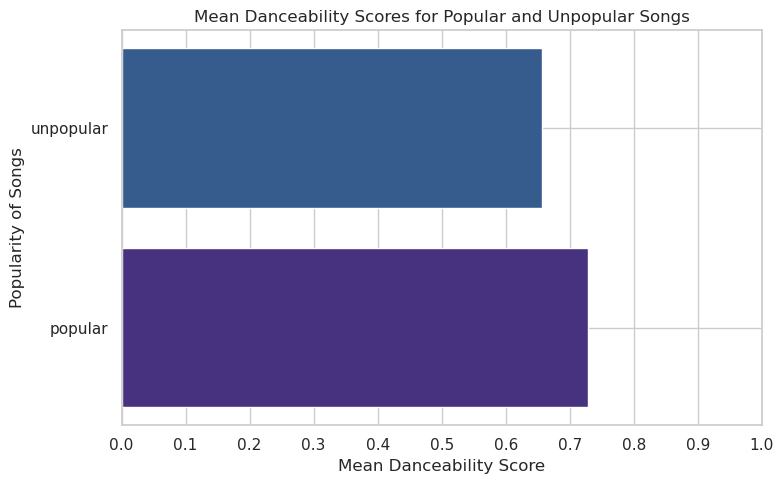

In [118]:
# Storing mean danceability scores in dict
mean_danceability = {'popular': popular_dance_clean['danceability'].mean(), 
                     'unpopular': unpopular_dance_clean['danceability'].mean()}

#visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_danceability.keys()), 
            width=list(mean_danceability.values()), 
            color=[sns.color_palette('viridis')[0],sns.color_palette('viridis')[1]]) 
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Danceability Score')
    ax.set_title('Mean Danceability Scores for Popular and Unpopular Songs')
    plt.tight_layout()

Above, it is clear that the popular songs tends to have a higher danceability score compared to unpopular songs.

#### Speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [119]:
# Removing outliers from danceability scores and separating them to Series for popular and unpopular songs
# The `find_outliers_IQR` function  returns boolean series where True represent an outlier
popular_speechiness_clean = popular_songs_df[~find_outliers_IQR(popular_songs_df['speechiness'])]
print(popular_speechiness_clean['speechiness'].describe())

unpopular_speechiness_clean = unpopular_songs_df[~find_outliers_IQR(unpopular_songs_df['speechiness'])]
print(unpopular_speechiness_clean['speechiness'].describe())

count    554.000000
mean       0.130499
std        0.094864
min        0.026100
25%        0.056550
50%        0.091250
75%        0.182750
max        0.398000
Name: speechiness, dtype: float64
count    6427.000000
mean        0.101813
std         0.079037
min         0.000000
25%         0.044800
50%         0.067500
75%         0.134000
max         0.346000
Name: speechiness, dtype: float64


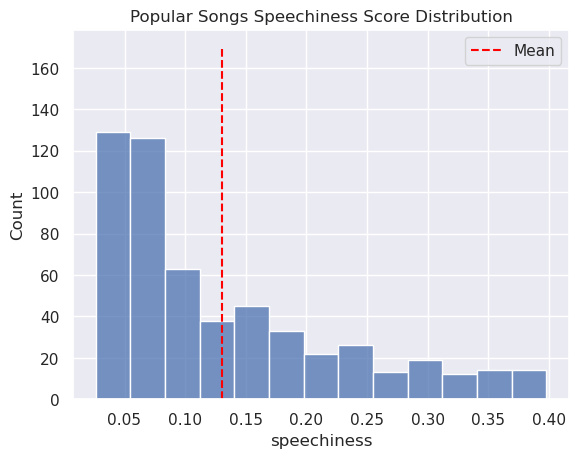

In [120]:
sns.histplot(data = popular_speechiness_clean, x='speechiness', bins='auto')
plt.title('Popular Songs Speechiness Score Distribution')
plt.vlines(x=popular_speechiness_clean['speechiness'].mean(), ymin=0, ymax=170, color='red', ls='--', label='Mean')
plt.legend()

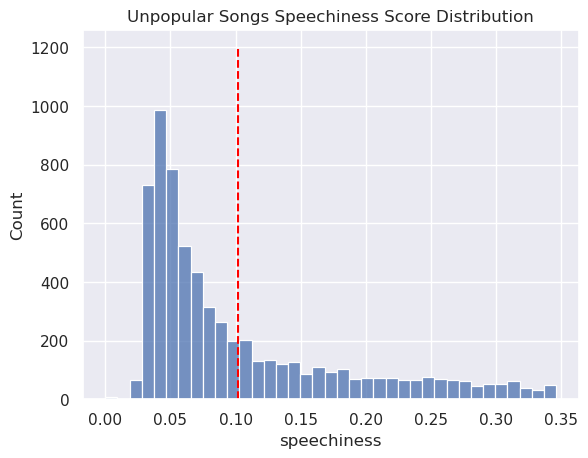

In [121]:
sns.histplot(data=unpopular_speechiness_clean, x='speechiness', bins='auto')
plt.title('Unpopular Songs Speechiness Score Distribution')
plt.vlines(x=unpopular_speechiness_clean['speechiness'].mean(), ymin=0, ymax=1200, color='red', ls='--', label='median')

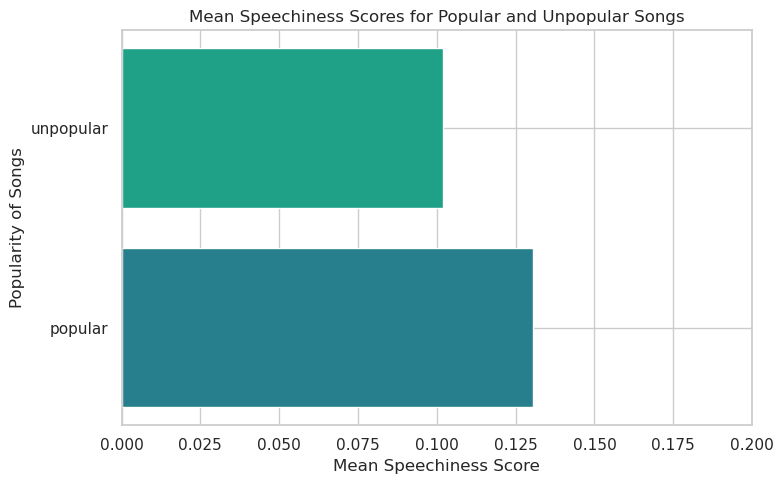

In [122]:
# Save mean acousticness scores in dict
mean_speechiness = {'popular': popular_speechiness_clean['speechiness'].mean(), 
                    'unpopular': unpopular_speechiness_clean['speechiness'].mean()
                   }

# Visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_speechiness.keys()), 
            width=list(mean_speechiness.values()), 
            color=[sns.color_palette('viridis')[2],sns.color_palette('viridis')[3]]) 
    ax.set_xlim(0, 0.2)
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Speechiness Score')
    ax.set_title('Mean Speechiness Scores for Popular and Unpopular Songs')
    plt.tight_layout()

Similar to danceability scores, we see that the popular songs tends to have a higher speechiness score.

#### Instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains **no** vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

In [123]:
# Removing outliers from instrumentalness scores and separating them to Series for popular and unpopular songs
popular_instrumentalness_clean = popular_songs_df[~find_outliers_IQR(popular_songs_df['instrumentalness'])]
print(popular_instrumentalness_clean['instrumentalness'].describe())

unpopular_instrumentalness_clean = unpopular_songs_df[~find_outliers_IQR(unpopular_songs_df['instrumentalness'])]
print(unpopular_instrumentalness_clean['instrumentalness'].describe())

count    459.000000
mean       0.000358
std        0.000970
min        0.000000
25%        0.000000
50%        0.000002
75%        0.000092
max        0.005920
Name: instrumentalness, dtype: float64
count    5441.000000
mean        0.000420
std         0.001251
min         0.000000
25%         0.000000
50%         0.000002
75%         0.000077
max         0.008460
Name: instrumentalness, dtype: float64


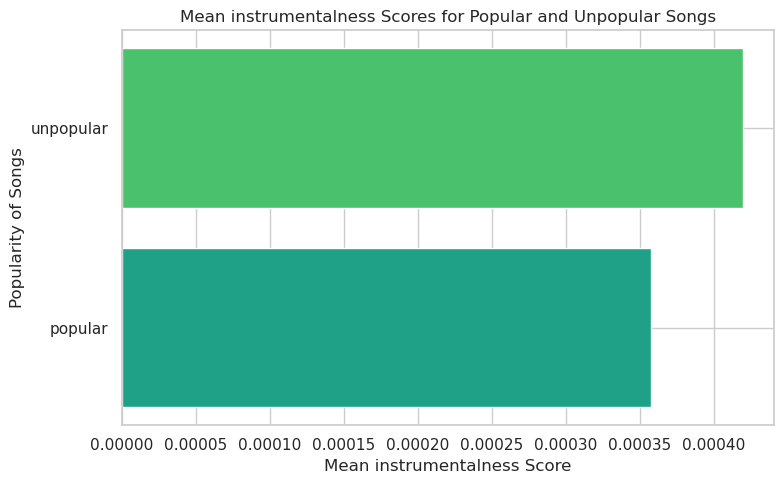

In [124]:
# Save mean instrumentalness scores in dict
mean_instrumentalness = {'popular':popular_instrumentalness_clean['instrumentalness'].mean(), 
                         'unpopular':unpopular_instrumentalness_clean['instrumentalness'].mean()
                        }
# Visualizing mean scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_instrumentalness.keys()), 
            width=list(mean_instrumentalness.values()), 
            color=[sns.color_palette('viridis')[3],sns.color_palette('viridis')[4]]) 
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean instrumentalness Score')
    ax.set_title('Mean instrumentalness Scores for Popular and Unpopular Songs')
    plt.tight_layout()

As can be seen above, the popular songs tends to be more vocal (low instrumentalness score) compare to unpopular songs.

## Prediction and Evaluation
In this section, I employ each model to predict the popularity of songs and assess their performance on a new dataset. This dataset comprises track features obtained from Spotify for songs by artists not included in either the training or test data. By utilizing this unseen dataset, I can evaluate how well the models perform on entirely new data that was not previously encountered during the training or testing phases.

In [125]:
# !pip install spotipy

In [126]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from credentials import SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET

client_credentials_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

###  New Data

In [127]:
# The code below (modified), used to get track features and properties, was adapted from
# https://www.kaggle.com/code/worlaalex/top-50-afrobeats-data-extraction-from-spotify

def TrackFeatures(track_id):
    meta = spotify.track(track_id)
    artist = spotify.artist(meta["artists"][0]["external_urls"]["spotify"])
    
    features = spotify.audio_features(track_id)
    genres = artist["genres"]
    # metadata
    track_name = meta['name']
    album_name = meta['album']['name']
    artist_name = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    duration_ms = meta['duration_ms']
    popularity = meta['popularity']

    # specific feartures
    if features[0]:
        acousticness = features[0]['acousticness']
        danceability = features[0]['danceability']
        energy = features[0]['energy']
        instrumentalness = features[0]['instrumentalness']
        liveness = features[0]['liveness']
        loudness = features[0]['loudness']
        speechiness = features[0]['speechiness']
        tempo = features[0]['tempo']
        time_signature = features[0]['time_signature']
        key = features[0]['key']
        mode = features[0]['mode']
        valence = features[0]['valence']

        track = [track_name, track_id, ",".join(genres), album_name, artist_name, release_date, duration_ms, 
                 popularity, danceability, key, acousticness, mode, energy, instrumentalness, liveness,
                 loudness, speechiness, tempo, time_signature, valence, 
                ]
    else:
        track = [np.nan] * 20
    return track

In [128]:
def get_features(track_ids):
    if isinstance(track_ids, list):
        tracks = [TrackFeatures(track_id) for track_id in track_ids]
        columns = ['track_name', 'track_id', 'genre', 'album_name', 'artist_name', 'release_date', 'duration_ms', 
                   'popularity', 'danceability', 'key', 'acousticness', 'mode', 'energy', 'instrumentalness',
                   'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence',
                  ]
        df = pd.DataFrame(tracks, columns=columns)
        return df
    
    else:
        print("Track ids must be surplied as a list")
    

In [129]:
def predict(df, model='logreg'):
    import re
    df_new = df.dropna()
    df_new['key'] = df_new['key'].astype('float')
    df_new['mode'] = df_new['mode'].astype('float')
    df_new['time_signature'] = df_new['time_signature'].astype('float')
    
    # Replace all 'afrobeat' with 'afrobeats'
    pattern = r'\bafrobeat\b'
    df['genre'] = df['genre'].apply(lambda x: re.sub(pattern, 'afrobeats', x))
    
    # Replace 'azonto' and 'azotobeat' with 'azontobeats'
    pattern = r'(\bazonto\b)|(\bazontobeat\b)'
    df_new['genre'] = df_new['genre'].apply(lambda x: re.sub(pattern, 'azontobeats', x))
    
    #creating columns for each genre in the new_genres list
    for genre in new_genres:
        pattern = re.compile(fr'\b{genre}\b')
        df_new[genre] = (df_new['genre'].apply(lambda x: bool(pattern.search(x)))).astype('int')
        
    #removing the redundant genre column
    df_new.drop('genre', axis=1, inplace=True)
    
    #dropping 'artist_name', 'track_name', 'album_name', and 'release_date' columns.
    df_new.drop(['artist_name', 'track_name', 'album_name', 'release_date'], 
            axis=1, inplace=True, errors='ignore',
           )
    df_new.set_index('track_id', inplace=True)    # Set the 'track_id' column as the index
    
    #define categorical columns
    cat_cols = ['key', 'mode', 'time_signature']
    
    #One hot encoding the dataframes
    from sklearn.preprocessing import OneHotEncoder

    encoder = OneHotEncoder(sparse_output=False, drop='first')
    data_ohe = encoder.fit_transform(df_new[cat_cols])
    df_ohe = pd.DataFrame(data_ohe, columns=encoder.get_feature_names_out(cat_cols), index=df_new.index)
    
    #merging OHE columns with numerical columns
    df_new = pd.concat([df_new.drop(cat_cols, axis=1), df_ohe], axis=1)
    
    # The test set must have the same columns as the training set, therefore 
    # we'll create the missing columns in the test set and fill with zeros 
    missing_cols = X_train.columns.difference(df_new.columns)
    if any(missing_cols):
        for cols in missing_cols:
            df_new[cols] = 0
    df_new = df_new[X_train.columns]
    
    # PREDICT
    if model == 'rf':
        y_pred = clf_rf_tuned.predict(df_new)
    elif model == 'xgb':
        y_pred = xgb_model.predict(df_new)
    elif model == 'logreg':
        if len(df_new) > 1:
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            df_new_sc = scaler.fit_transform(df_new)
            y_pred = clf_logregcv_tuned.predict(df_new_sc)
        elif len(df_new) == 1:
            y_pred = clf_logregcv_tuned.predict(df_new.values)
    
    return y_pred

In [130]:
# # This ids are track ids from artist not in the original data set
# ids = ['2khv04F26pnJr4989Maowi', '1rrqJ9QkOBYJlsZgqqwxgB', '1IMRi5UVOV77PsAgdWDvzh', '5FHwYRqxv08eyWWw7ARzJj',
#        '7f3xivnGz4HU0UigVxvlEe', '3cRYXW7xZ6GJttdlPhBb1k', '54KmblozuEemR23n9a4Grt', '4vb777iaycnlFxVkJMmtfd',
#        '5aIVCx5tnk0ntmdiinnYvw', "7lu6f7znGvbUpjFKvdqC8B", '3eWpfsYgd5OL2QdwcVcF6Q', '4YAd7QqSKHz6dS2MCnq4mO',
#        '7xzMrUmlooPa1Fmp88hlYc', '6gfdkLXXBzNUkCsf31PVYm', '24qQClclS8CCjiCZKM8d9m', '5aNRjr4RchxYx1tT8z6CWa',
#       ]
# df_new = get_features(ids)
# df_new

**Since the Auidio features end point of the Spotify API  is [deprecated](https://developer.spotify.com/blog/2024-11-27-changes-to-the-web-api), we will rely on our validation set to perform the prediction**

### Validation Data

In [131]:
validation.shape

(1369, 20)

In [132]:
validation.isna().sum()

track_name           0
track_id             0
genre               46
album_name           0
artist_name          0
release_date         0
duration_ms          0
popularity           0
danceability         0
key                  0
acousticness         0
mode                 0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
time_signature       0
valence              0
dtype: int64

In [133]:
validation = validation.dropna()
validation.isna().sum()

track_name          0
track_id            0
genre               0
album_name          0
artist_name         0
release_date        0
duration_ms         0
popularity          0
danceability        0
key                 0
acousticness        0
mode                0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [134]:
validation.shape

(1323, 20)

In [135]:
valid_popular = validation[validation['popularity'] >= 42.5]
valid_popular.shape

(100, 20)

In [136]:
valid_unpopular = validation[validation['popularity'] < 42.5]
valid_unpopular.shape

(1223, 20)

In [137]:
df_new = validation.copy()
df_new

,track_name,track_id,genre,album_name,artist_name,release_date,duration_ms,popularity,danceability,key,acousticness,mode,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Phaseur (Live),7riMewdeFzIouweIXf04O4,"azontobeats,ndombolo,rumba congolaise,soukous,...","100% tcha tcho, Vol. 2 (Live)",Koffi Olomide,2009-01-01,451786.0,2.0,0.502,2.0,0.567000,1.0,0.804,0.00000,0.1340,-7.214,0.0442,125.804,4.0,0.849
1,I Do,3pzAmz9wv1xkzxWWcDh0QR,"afrobeats,nigerian pop",Sorry I'm Late,Bnxn,2021-10-27,163042.0,46.0,0.737,6.0,0.514000,0.0,0.324,0.00133,0.1590,-5.293,0.2240,81.957,4.0,0.576
2,Aben Wo Aha,1sw1Ahq16MtmeFIwEgXxKm,"azonto,hiplife",Aben Wo Aha,Daddy Lumba,1998-03-27,310666.0,42.0,0.789,0.0,0.110000,1.0,0.784,0.00049,0.0594,-5.346,0.0454,114.443,4.0,0.958
3,Trésor public,3vEImpLOPvbjP2SG1Zn3Fq,"azontobeats,ndombolo,rumba congolaise,soukous,...",Légende Ed. Diamond,Koffi Olomide,2022-11-25,410680.0,20.0,0.560,10.0,0.663000,1.0,0.657,0.00270,0.1430,-6.944,0.0531,137.983,4.0,0.790
4,No More Cryin,4w3Kz4PP3tuEdC20LI9SpJ,"afropop,jazz trumpet,kwaito,south african jazz",Notes of Life,Hugh Masekela,1996-11-02,284666.0,1.0,0.631,5.0,0.235000,1.0,0.261,0.00257,0.1490,-14.778,0.0357,167.913,3.0,0.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,The Break Up,4gDJDDNiL6e1TmqjhVfhvS,"afro soul,kwaito,sda a cappella,south african ...",Echoes Of Kofifi,The Soil,2016-10-21,269173.0,37.0,0.470,3.0,0.539000,1.0,0.395,0.00000,0.3250,-8.161,0.0330,127.126,4.0,0.542
1365,Heartbreaker (feat. Nasty C),28qXHN4aeQ3D2asjK0Vouz,"afrobeats,nigerian hip hop,nigerian pop",Sex Over Love,Blaqbonez,2021-04-30,155000.0,28.0,0.743,1.0,0.271000,1.0,0.670,0.00000,0.1580,-4.740,0.0778,125.931,4.0,0.655
1366,Steppin' Out,3oQZ4ss7H33riju34UaVW0,"afropop,jazz trumpet,kwaito,south african jazz",Beatin' Aroun De Bush,Hugh Masekela,1992-04-04,215346.0,2.0,0.549,8.0,0.252000,1.0,0.460,0.36900,0.0290,-15.011,0.0419,169.611,4.0,0.822
1367,Ngibambe,65vVCIdceUiRTnRtG10LNz,"afro soul,south african house,south african pop",Highly Flavoured,Busiswa,2017-01-01,298431.0,8.0,0.790,1.0,0.000388,1.0,0.606,0.14700,0.3930,-7.872,0.0340,124.998,4.0,0.430


#### Random Forest Prediction

In [138]:
import numpy as np

# Predict using Random Forest model
prediction_rf = predict(df_new.drop('popularity', axis=1, errors='ignore'), model='rf')

# Prepare dataframe for evaluation
df_pred_rf = df_new.loc[:, ['track_name', 'artist_name', 'popularity']].copy()

# Assign true labels based on popularity threshold
df_pred_rf['true_value'] = df_pred_rf['popularity'].apply(lambda x: 'popular' if x >= 42.5 else 'unpopular')

# Assign predicted labels
df_pred_rf['prediction'] = np.where(np.array(prediction_rf) == 1, 'popular', 'unpopular')

# Compute classification counts
total_samples = len(df_pred_rf)
correct = (df_pred_rf['true_value'] == df_pred_rf['prediction']).sum()
misclassified = total_samples - correct

# Count subclass predictions
popular_total = (df_pred_rf['true_value'] == 'popular').sum()
popular_correct = ((df_pred_rf['true_value'] == 'popular') & (df_pred_rf['prediction'] == 'popular')).sum()
popular_misclassified = popular_total - popular_correct

unpopular_total = (df_pred_rf['true_value'] == 'unpopular').sum()
unpopular_correct = ((df_pred_rf['true_value'] == 'unpopular') & (df_pred_rf['prediction'] == 'unpopular')).sum()
unpopular_misclassified = unpopular_total - unpopular_correct

# Calculate percentages
accuracy = (correct / total_samples) * 100
popular_accuracy = (popular_correct / popular_total) * 100 if popular_total > 0 else 0
unpopular_accuracy = (unpopular_correct / unpopular_total) * 100 if unpopular_total > 0 else 0
popular_misclassification_rate = (popular_misclassified / popular_total) * 100 if popular_total > 0 else 0
unpopular_misclassification_rate = (unpopular_misclassified / unpopular_total) * 100 if unpopular_total > 0 else 0

# Print results
print(f'Correctly classified: {correct} ({accuracy:.2f}%)')
print(f'Misclassified: {misclassified} ({100 - accuracy:.2f}%)')
print(f'Popular songs correctly classified: {popular_correct} ({popular_accuracy:.2f}%)')
print(f'Popular songs misclassified as unpopular: {popular_misclassified} ({popular_misclassification_rate:.2f}%)')
print(f'Unpopular songs correctly classified: {unpopular_correct} ({unpopular_accuracy:.2f}%)')
print(f'Unpopular songs misclassified as popular: {unpopular_misclassified} ({unpopular_misclassification_rate:.2f}%)')

# Display predictions
df_pred_rf


Correctly classified: 1088 (82.24%)
Misclassified: 235 (17.76%)
Popular songs correctly classified: 63 (63.00%)
Popular songs misclassified as unpopular: 37 (37.00%)
Unpopular songs correctly classified: 1025 (83.81%)
Unpopular songs misclassified as popular: 198 (16.19%)


,track_name,artist_name,popularity,true_value,prediction
0,Phaseur (Live),Koffi Olomide,2.0,unpopular,unpopular
1,I Do,Bnxn,46.0,popular,popular
2,Aben Wo Aha,Daddy Lumba,42.0,unpopular,unpopular
3,Trésor public,Koffi Olomide,20.0,unpopular,unpopular
4,No More Cryin,Hugh Masekela,1.0,unpopular,unpopular
...,...,...,...,...,...
1364,The Break Up,The Soil,37.0,unpopular,unpopular
1365,Heartbreaker (feat. Nasty C),Blaqbonez,28.0,unpopular,popular
1366,Steppin' Out,Hugh Masekela,2.0,unpopular,unpopular
1367,Ngibambe,Busiswa,8.0,unpopular,unpopular


#### Logistic Regression Prediction

In [139]:
import numpy as np

# Predict using Logistic Regression model
prediction_logreg = predict(df_new.drop('popularity', axis=1, errors='ignore'), model='logreg')

# Prepare dataframe for evaluation
df_pred_logreg = df_new.loc[:, ['track_name', 'artist_name', 'popularity']].copy()

# Assign true labels based on popularity threshold
df_pred_logreg['true_value'] = df_pred_logreg['popularity'].apply(lambda x: 'popular' if x >= 42.5 else 'unpopular')

# Assign predicted labels
df_pred_logreg['prediction'] = np.where(np.array(prediction_logreg) == 1, 'popular', 'unpopular')

# Compute classification counts
total_samples = len(df_pred_logreg)
correct = (df_pred_logreg['true_value'] == df_pred_logreg['prediction']).sum()
misclassified = total_samples - correct

# Count subclass predictions
popular_total = (df_pred_logreg['true_value'] == 'popular').sum()
popular_correct = ((df_pred_logreg['true_value'] == 'popular') & (df_pred_logreg['prediction'] == 'popular')).sum()
popular_misclassified = popular_total - popular_correct

unpopular_total = (df_pred_logreg['true_value'] == 'unpopular').sum()
unpopular_correct = ((df_pred_logreg['true_value'] == 'unpopular') & (df_pred_logreg['prediction'] == 'unpopular')).sum()
unpopular_misclassified = unpopular_total - unpopular_correct

# Calculate percentages
accuracy = (correct / total_samples) * 100
popular_accuracy = (popular_correct / popular_total) * 100 if popular_total > 0 else 0
unpopular_accuracy = (unpopular_correct / unpopular_total) * 100 if unpopular_total > 0 else 0
popular_misclassification_rate = (popular_misclassified / popular_total) * 100 if popular_total > 0 else 0
unpopular_misclassification_rate = (unpopular_misclassified / unpopular_total) * 100 if unpopular_total > 0 else 0

# Print results
print(f'Correctly classified: {correct} ({accuracy:.2f}%)')
print(f'Misclassified: {misclassified} ({100 - accuracy:.2f}%)')
print(f'Popular songs correctly classified: {popular_correct} ({popular_accuracy:.2f}%)')
print(f'Popular songs misclassified as unpopular: {popular_misclassified} ({popular_misclassification_rate:.2f}%)')
print(f'Unpopular songs correctly classified: {unpopular_correct} ({unpopular_accuracy:.2f}%)')
print(f'Unpopular songs misclassified as popular: {unpopular_misclassified} ({unpopular_misclassification_rate:.2f}%)')

# Display predictions
df_pred_logreg


Correctly classified: 695 (52.53%)
Misclassified: 628 (47.47%)
Popular songs correctly classified: 97 (97.00%)
Popular songs misclassified as unpopular: 3 (3.00%)
Unpopular songs correctly classified: 598 (48.90%)
Unpopular songs misclassified as popular: 625 (51.10%)


,track_name,artist_name,popularity,true_value,prediction
0,Phaseur (Live),Koffi Olomide,2.0,unpopular,unpopular
1,I Do,Bnxn,46.0,popular,popular
2,Aben Wo Aha,Daddy Lumba,42.0,unpopular,unpopular
3,Trésor public,Koffi Olomide,20.0,unpopular,unpopular
4,No More Cryin,Hugh Masekela,1.0,unpopular,unpopular
...,...,...,...,...,...
1364,The Break Up,The Soil,37.0,unpopular,unpopular
1365,Heartbreaker (feat. Nasty C),Blaqbonez,28.0,unpopular,popular
1366,Steppin' Out,Hugh Masekela,2.0,unpopular,unpopular
1367,Ngibambe,Busiswa,8.0,unpopular,popular


#### XGBoost Prediction

In [140]:
import numpy as np

# Predict using XGBoost model
prediction_xgb = predict(df_new.drop('popularity', axis=1, errors='ignore'), model='xgb')

# Prepare dataframe for evaluation
df_pred_xgb = df_new.loc[:, ['track_name', 'artist_name', 'popularity']].copy()

# Assign true labels based on popularity threshold
df_pred_xgb['true_value'] = df_pred_xgb['popularity'].apply(lambda x: 'popular' if x >= 42.5 else 'unpopular')

# Assign predicted labels
df_pred_xgb['prediction'] = np.where(np.array(prediction_xgb) == 1, 'popular', 'unpopular')

# Compute classification counts
total_samples = len(df_pred_xgb)
correct = (df_pred_xgb['true_value'] == df_pred_xgb['prediction']).sum()
misclassified = total_samples - correct

# Count subclass predictions
popular_total = (df_pred_xgb['true_value'] == 'popular').sum()
popular_correct = ((df_pred_xgb['true_value'] == 'popular') & (df_pred_xgb['prediction'] == 'popular')).sum()
popular_misclassified = popular_total - popular_correct

unpopular_total = (df_pred_xgb['true_value'] == 'unpopular').sum()
unpopular_correct = ((df_pred_xgb['true_value'] == 'unpopular') & (df_pred_xgb['prediction'] == 'unpopular')).sum()
unpopular_misclassified = unpopular_total - unpopular_correct

# Calculate percentages
accuracy = (correct / total_samples) * 100
popular_accuracy = (popular_correct / popular_total) * 100 if popular_total > 0 else 0
unpopular_accuracy = (unpopular_correct / unpopular_total) * 100 if unpopular_total > 0 else 0
popular_misclassification_rate = (popular_misclassified / popular_total) * 100 if popular_total > 0 else 0
unpopular_misclassification_rate = (unpopular_misclassified / unpopular_total) * 100 if unpopular_total > 0 else 0

# Print results
print(f'Correctly classified: {correct} ({accuracy:.2f}%)')
print(f'Misclassified: {misclassified} ({100 - accuracy:.2f}%)')
print(f'Popular songs correctly classified: {popular_correct} ({popular_accuracy:.2f}%)')
print(f'Popular songs misclassified as unpopular: {popular_misclassified} ({popular_misclassification_rate:.2f}%)')
print(f'Unpopular songs correctly classified: {unpopular_correct} ({unpopular_accuracy:.2f}%)')
print(f'Unpopular songs misclassified as popular: {unpopular_misclassified} ({unpopular_misclassification_rate:.2f}%)')

# Display predictions
df_pred_xgb


Correctly classified: 984 (74.38%)
Misclassified: 339 (25.62%)
Popular songs correctly classified: 78 (78.00%)
Popular songs misclassified as unpopular: 22 (22.00%)
Unpopular songs correctly classified: 906 (74.08%)
Unpopular songs misclassified as popular: 317 (25.92%)


,track_name,artist_name,popularity,true_value,prediction
0,Phaseur (Live),Koffi Olomide,2.0,unpopular,unpopular
1,I Do,Bnxn,46.0,popular,popular
2,Aben Wo Aha,Daddy Lumba,42.0,unpopular,unpopular
3,Trésor public,Koffi Olomide,20.0,unpopular,unpopular
4,No More Cryin,Hugh Masekela,1.0,unpopular,unpopular
...,...,...,...,...,...
1364,The Break Up,The Soil,37.0,unpopular,unpopular
1365,Heartbreaker (feat. Nasty C),Blaqbonez,28.0,unpopular,popular
1366,Steppin' Out,Hugh Masekela,2.0,unpopular,unpopular
1367,Ngibambe,Busiswa,8.0,unpopular,unpopular


In [141]:
df_pred_all_model = df_new.loc[:, ['track_name', 'artist_name', 'popularity']] 
df_pred_all_model['true_value'] = df_pred_all_model['popularity'].apply(lambda x: 'popular' if x>=42.5 else 'unpopular')
df_pred_all_model['Random Forest Prediction'] = df_pred_rf['prediction']
df_pred_all_model['Logistic Regrssion Prediction'] = df_pred_xgb['prediction']
df_pred_all_model['XGBoost Prediction'] = df_pred_xgb['prediction']
df_pred_all_model.head(10)

,track_name,artist_name,popularity,true_value,Random Forest Prediction,Logistic Regrssion Prediction,XGBoost Prediction
0,Phaseur (Live),Koffi Olomide,2.0,unpopular,unpopular,unpopular,unpopular
1,I Do,Bnxn,46.0,popular,popular,popular,popular
2,Aben Wo Aha,Daddy Lumba,42.0,unpopular,unpopular,unpopular,unpopular
3,Trésor public,Koffi Olomide,20.0,unpopular,unpopular,unpopular,unpopular
4,No More Cryin,Hugh Masekela,1.0,unpopular,unpopular,unpopular,unpopular
5,Evil Boy,Die Antwoord,29.0,unpopular,unpopular,unpopular,unpopular
6,Liwa Wechi - Congolese Lament. The Wife Bids H...,Miriam Makeba,0.0,unpopular,unpopular,unpopular,unpopular
7,BASE - Skit,Adje,0.0,unpopular,unpopular,unpopular,unpopular
8,Kelele,Angelique Kidjo,10.0,unpopular,unpopular,unpopular,unpopular
9,Child Of The Earth,Hugh Masekela,10.0,unpopular,unpopular,unpopular,unpopular


Random Forest achieved the highest overall accuracy at 82.24%, correctly classifying most songs. However, it struggled with identifying popular songs, misclassifying 37 as unpopular, leading to a lower performance in this category. Logistic Regression, on the other hand, excelled at detecting popular songs with 97% accuracy but performed poorly overall, with a low 52.53% accuracy due to frequent misclassification of unpopular songs. XGBoost provided a more balanced performance, achieving 74% accuracy while correctly classifying 78% of popular songs. **Although Random Forest had the best overall classification, XGBoost appears to be the more reliable choice due to its better handling of both categories (popular and unpopular)**. 

In [ ]:
# df_pred_all_model.to_csv("Prediction_result.csv", index=False)